# Libraries and Google Drive

In [ ]:
## for data
import pandas as pd
import numpy as np # Used to do data processing

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## for statistical tests
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller # Used to check stationarity 
from google.colab import files

## for machine learning
import sklearn
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

In [ ]:
sns.set(rc={"figure.figsize":(18, 6)})

color: https://matplotlib.org/stable/gallery/color/named_colors.html

In [ ]:
# Import Google Drive
# You have to shortcut Basile's file in our Drive to find it
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Data importation and formating

In [ ]:
# Same link for everyone:
data = pd.read_sas("/content/gdrive/MyDrive/DRIM challenge/construct_red.sas7bdat")

In [ ]:
data.shape

(78, 82)

In [ ]:
data.columns

Index(['TRIMESTRE', 'CHRONIQUE', 'DR', 'mean_1', 'median_1', 'p5_1', 'p10_1',
       'p25_1', 'p75_1', 'p90_1', 'p95_1', 'mean_2', 'median_2', 'p5_2',
       'p10_2', 'p25_2', 'p75_2', 'p90_2', 'p95_2', 'mean_3', 'median_3',
       'p5_3', 'p10_3', 'p25_3', 'p75_3', 'p90_3', 'p95_3', 'mean_4',
       'median_4', 'p5_4', 'p10_4', 'p25_4', 'p75_4', 'p90_4', 'p95_4',
       'mean_5', 'median_5', 'p5_5', 'p10_5', 'p25_5', 'p75_5', 'p90_5',
       'p95_5', 'mean_6', 'median_6', 'p5_6', 'p10_6', 'p25_6', 'p75_6',
       'p90_6', 'p95_6', 'mean_7', 'median_7', 'p5_7', 'p10_7', 'p25_7',
       'p75_7', 'p90_7', 'p95_7', 'mean_8', 'median_8', 'p5_8', 'p10_8',
       'p25_8', 'p75_8', 'p90_8', 'p95_8', 'CD_TY_CLI_RCI_1',
       'CD_TY_CLI_RCI_2', 'CD_ETA_CIV_1', 'CD_ETA_CIV_2', 'CD_MOD_HABI_1',
       'CD_MOD_HABI_2', 'CD_PROF_1', 'CD_PROF_2', 'CD_PROF_3', 'CD_QUAL_VEH_1',
       'CD_QUAL_VEH_2', 'dtf_per_trt', 'PIB', 'Inflation', 'Tx_cho'],
      dtype='object')

In [ ]:
# First view of the data:
data.head()

,TRIMESTRE,CHRONIQUE,DR,mean_1,median_1,p5_1,p10_1,p25_1,p75_1,p90_1,...,CD_MOD_HABI_2,CD_PROF_1,CD_PROF_2,CD_PROF_3,CD_QUAL_VEH_1,CD_QUAL_VEH_2,dtf_per_trt,PIB,Inflation,Tx_cho
0,2008-12-31,b'CHR2',0.0030,0.994843,0.995192,0.992081,0.992530,0.993691,0.996259,0.996862,...,0.727543,0.070852,0.351216,0.577932,0.392129,0.607871,b'Q42008',497736.0,1.760576,7.8
1,2008-12-31,b'CHR8',0.1924,0.945694,0.953968,0.870889,0.890246,0.924743,0.976024,0.990229,...,0.320747,0.181759,0.541801,0.276439,0.548512,0.451488,b'Q42008',497736.0,1.760576,7.8
2,2008-12-31,b'Totale',0.0240,0.975114,0.993819,0.909173,0.940773,0.978358,0.998133,0.999224,...,0.656708,0.102888,0.370723,0.526389,0.451145,0.548855,b'Q42008',497736.0,1.760576,7.8
3,2009-03-31,b'CHR2',0.0025,0.994782,0.995192,0.992097,0.992579,0.993694,0.996275,0.996862,...,0.738127,0.068228,0.342803,0.588969,0.376661,0.623339,b'Q12009',489227.0,0.624887,8.6
4,2009-03-31,b'CHR8',0.1436,0.947787,0.956417,0.870889,0.893328,0.927447,0.978988,0.991735,...,0.346455,0.177304,0.532900,0.289797,0.543935,0.456065,b'Q12009',489227.0,0.624887,8.6


In [ ]:
data.tail()

,TRIMESTRE,CHRONIQUE,DR,mean_1,median_1,p5_1,p10_1,p25_1,p75_1,p90_1,...,CD_MOD_HABI_2,CD_PROF_1,CD_PROF_2,CD_PROF_3,CD_QUAL_VEH_1,CD_QUAL_VEH_2,dtf_per_trt,PIB,Inflation,Tx_cho
73,2014-12-31,b'CHR8',0.1420,0.945045,0.954124,0.867099,0.890238,0.923678,0.976668,0.990908,...,0.380543,0.163969,0.550329,0.285702,0.445203,0.554797,b'Q4 2014',519315.0,0.277815,10.500000
74,2014-12-31,b'Totale',0.0148,0.979524,0.993822,0.913891,0.941424,0.977598,0.998348,0.999386,...,0.697692,0.093913,0.375277,0.530810,0.393627,0.606373,b'Q4 2014',519315.0,0.277815,10.500000
75,2015-03-31,b'CHR2',0.0019,0.994820,0.995156,0.992071,0.992495,0.993647,0.996268,0.996839,...,0.802613,0.072954,0.352079,0.574967,0.344226,0.655774,b'Q1 2015',522560.0,-0.240585,10.366667
76,2015-03-31,b'CHR8',0.1381,0.944559,0.953416,0.866626,0.888926,0.922654,0.976460,0.990459,...,0.373486,0.166169,0.551933,0.281898,0.449726,0.550274,b'Q1 2015',522560.0,-0.240585,10.366667
77,2015-03-31,b'Totale',0.0145,0.979689,0.993815,0.914376,0.941545,0.977605,0.998367,0.999413,...,0.691620,0.095614,0.384833,0.519553,0.390524,0.609476,b'Q1 2015',522560.0,-0.240585,10.366667


In [ ]:
df = data[data.CHRONIQUE == b'Totale']
df.set_index(df.TRIMESTRE,inplace=True)

Y = df['DR']

df = df.drop(['DR','TRIMESTRE','CHRONIQUE','dtf_per_trt'],axis = 1)

# we assure the type float of our variables
df = df.astype('float64', copy=True)
Y = Y.astype('float64', copy=True)

In [ ]:
df2 = data[data.CHRONIQUE == b'CHR2']
df2.set_index(df2.TRIMESTRE,inplace=True)

Y2 = df2['DR']

# We are defining the Index as the datetime
df2 = df2.drop(['DR','TRIMESTRE','CHRONIQUE','dtf_per_trt'],axis = 1)

# we assure the type float of our variables
df2 = df2.astype('float64', copy=True)
Y2 = Y2.astype('float64', copy=True)

In [ ]:
df8 = data[data.CHRONIQUE == b'CHR8']
df8.set_index(df8.TRIMESTRE,inplace=True)

Y8 = df8['DR']

# We are defining the Index as the datetime
df8 = df8.drop(['DR','TRIMESTRE','CHRONIQUE','dtf_per_trt'],axis = 1)

# we assure the type float of our variables
df8 = df8.astype('float64', copy=True)
Y8 = Y8.astype('float64', copy=True)

In [ ]:
print(Y.shape,df.shape)

(26,) (26, 78)


In [ ]:
#df.info()

# Exploration Data

## About DR

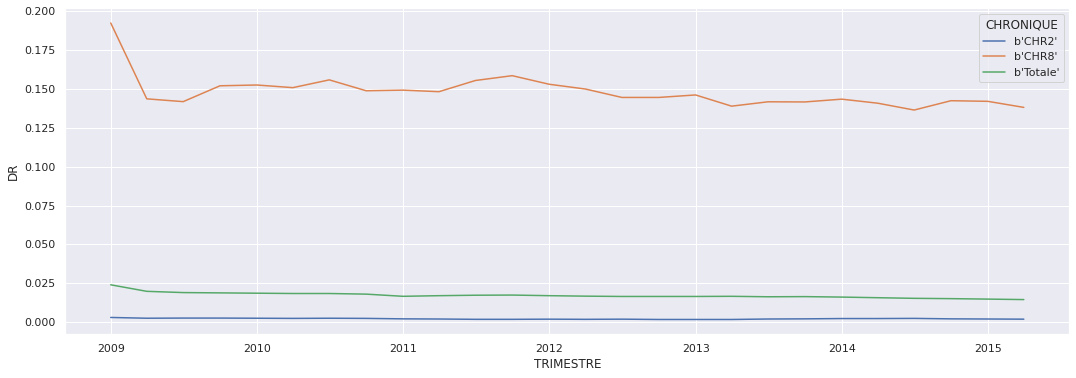

In [ ]:
sns.lineplot(data=data,x='TRIMESTRE',y='DR',hue='CHRONIQUE',color= 'r')

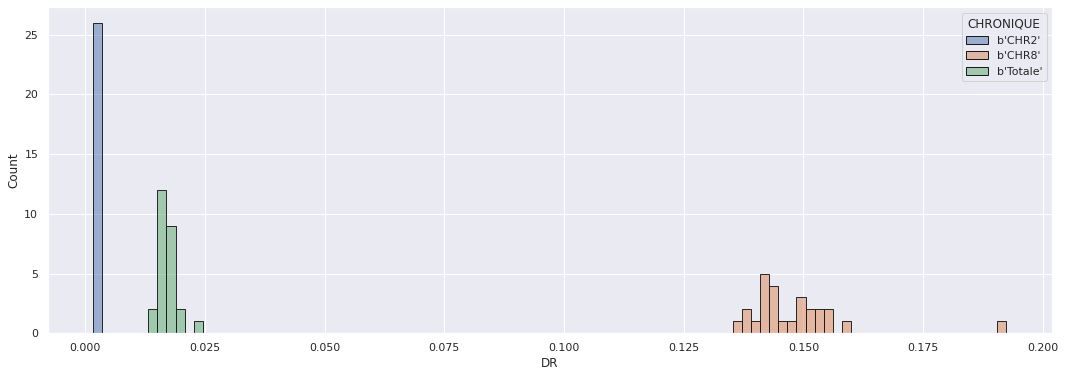

In [ ]:
sns.histplot(data=data,x='DR',hue='CHRONIQUE',bins = 100, color='c', edgecolor='k')

## Type de client

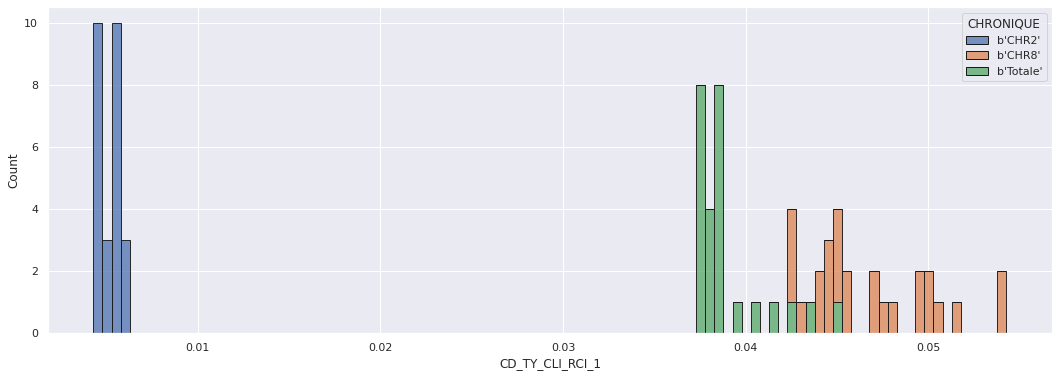

In [ ]:
sns.histplot(data=data,x='CD_TY_CLI_RCI_1',hue='CHRONIQUE',bins = 100, color='c', edgecolor='k',multiple="stack")

## Mode d'habitation

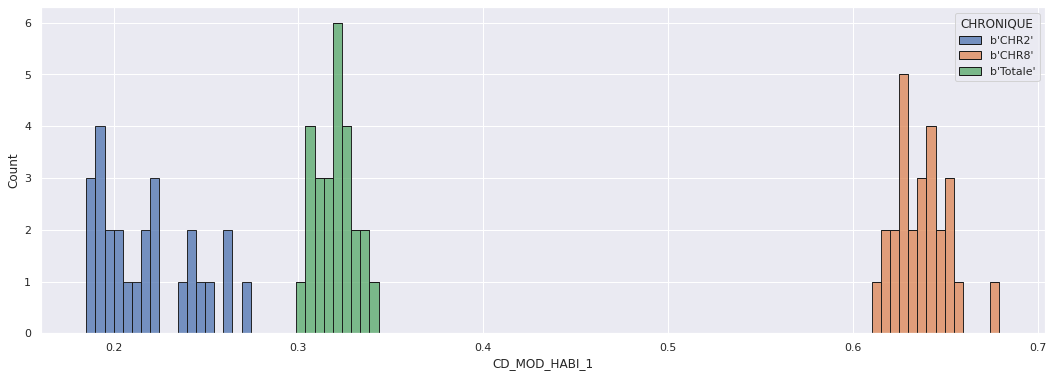

In [ ]:
sns.histplot(data=data,x='CD_MOD_HABI_1',hue='CHRONIQUE',bins = 100, color='c', edgecolor='k',multiple="stack")

## Etat civil

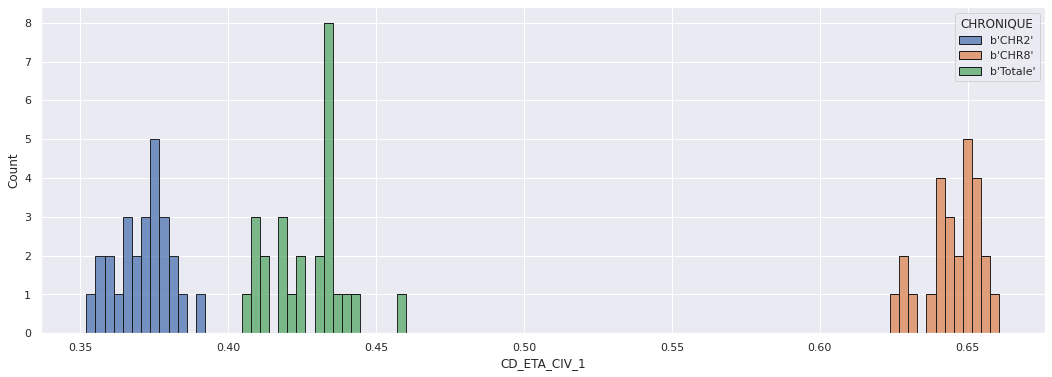

In [ ]:
sns.histplot(data=data,x='CD_ETA_CIV_1',hue='CHRONIQUE',bins = 100, color='c', edgecolor='k',multiple="stack")

## Code qualité du véhicule

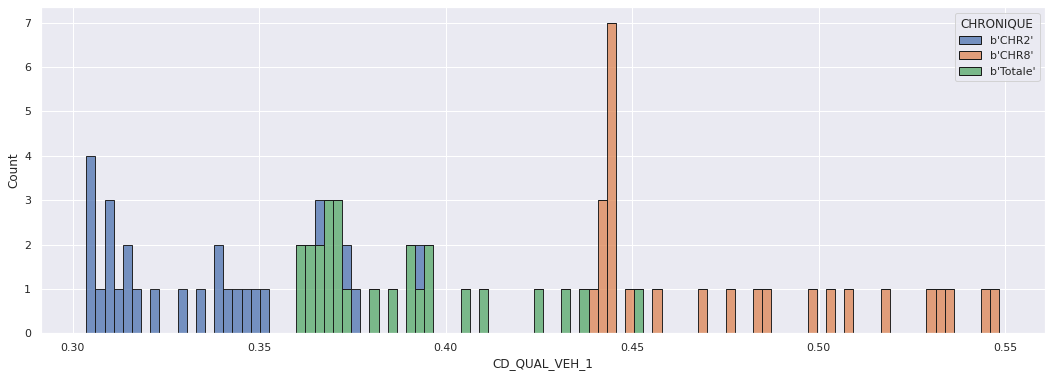

In [ ]:
sns.histplot(data=data,x='CD_QUAL_VEH_1',hue='CHRONIQUE',bins = 100, color='c', edgecolor='k',multiple="stack")

## Profession

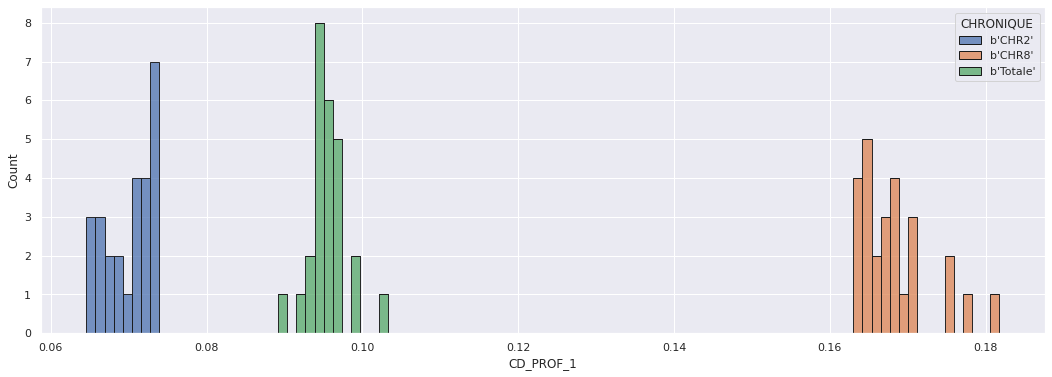

In [ ]:
sns.histplot(data=data,x='CD_PROF_1',hue='CHRONIQUE',bins = 100, color='c', edgecolor='k',multiple="stack")

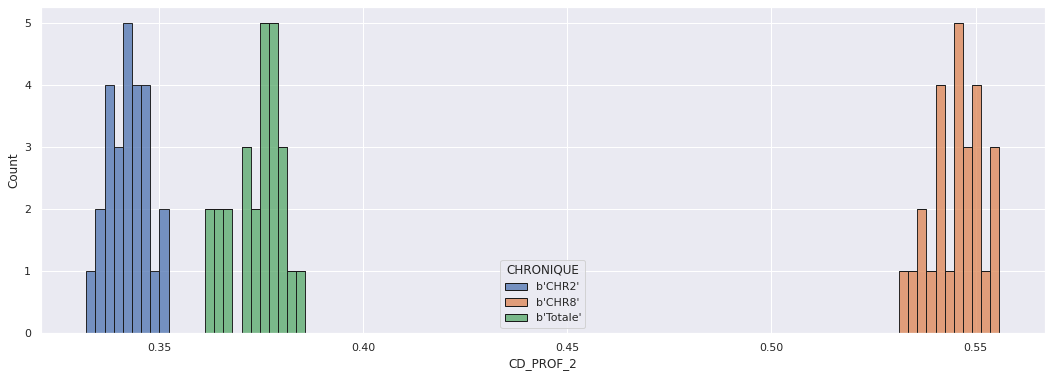

In [ ]:
sns.histplot(data=data,x='CD_PROF_2',hue='CHRONIQUE',bins = 100, color='c', edgecolor='k',multiple="stack")

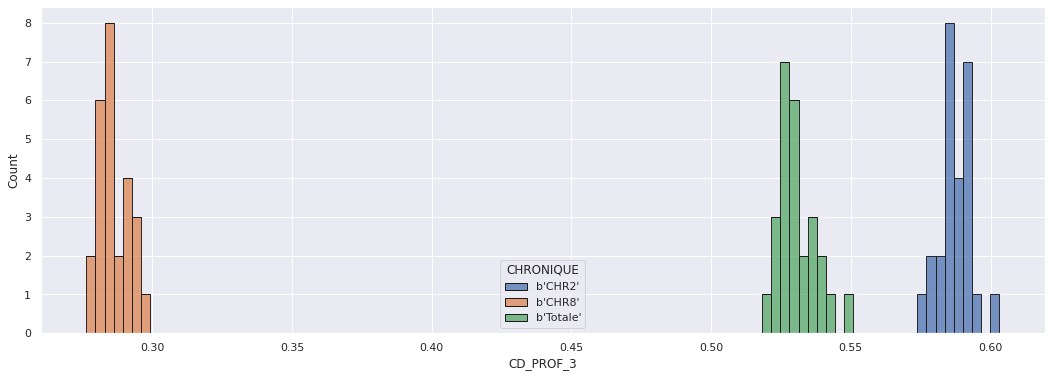

In [ ]:
sns.histplot(data=data,x='CD_PROF_3',hue='CHRONIQUE',bins = 100, color='c', edgecolor='k',multiple="stack")

## Macro

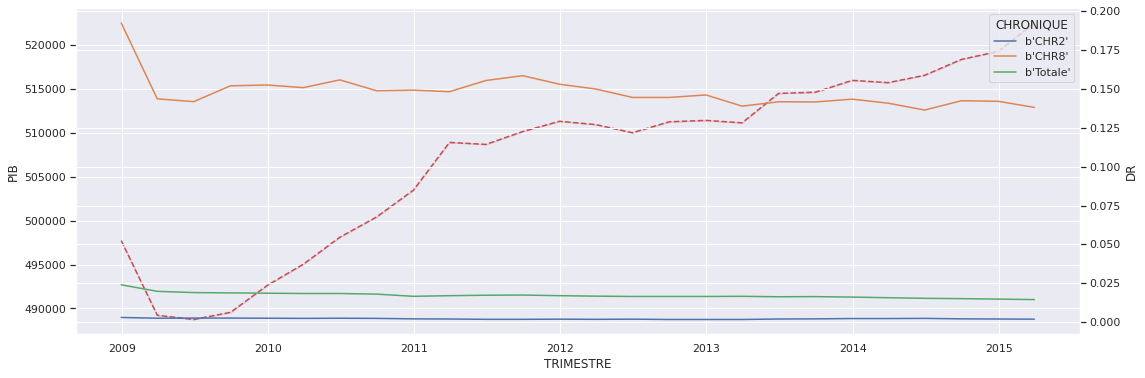

In [ ]:
fig, ax1 = plt.subplots()
sns.lineplot(data=data,x='TRIMESTRE',y='PIB',color='r',linestyle="dashed",ax=ax1)

ax2 = ax1.twinx()
sns.lineplot(data=data,x='TRIMESTRE',y='DR',hue='CHRONIQUE',ax=ax2)

plt.show()

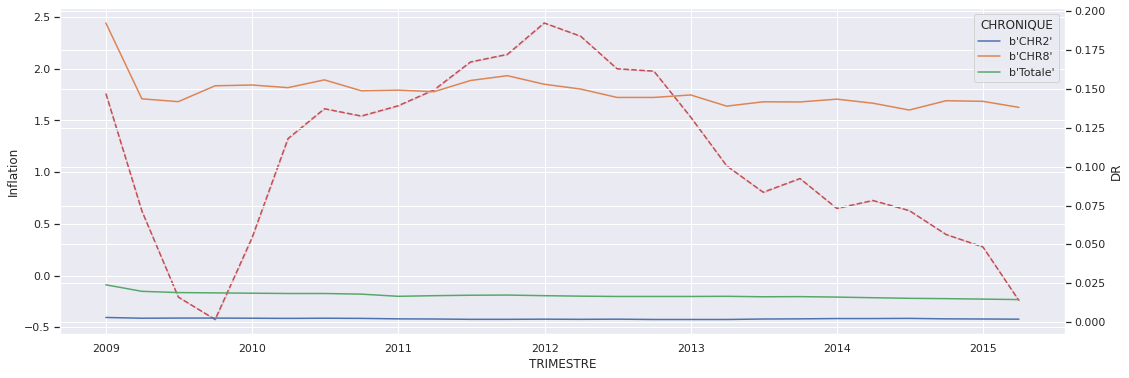

In [ ]:
fig, ax1 = plt.subplots()
sns.lineplot(data=data,x='TRIMESTRE',y='Inflation',color='r',linestyle="dashed",ax=ax1)

ax2 = ax1.twinx()
sns.lineplot(data=data,x='TRIMESTRE',y='DR',hue='CHRONIQUE',ax=ax2)

plt.show()

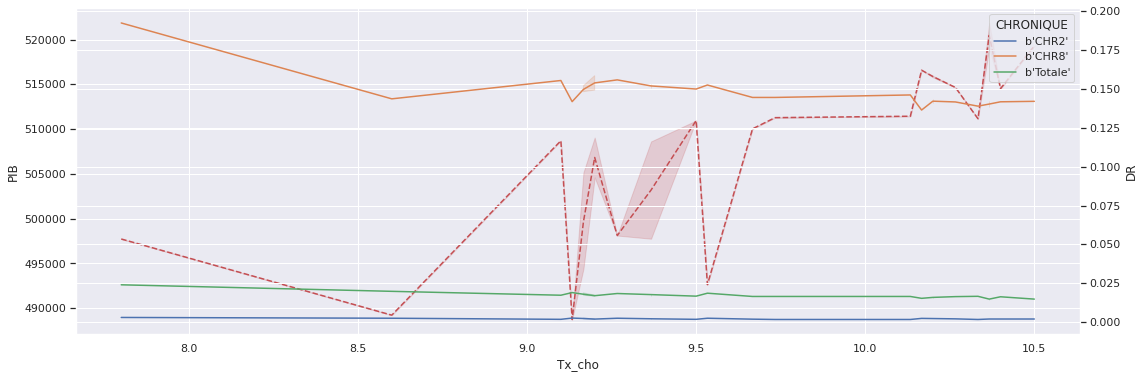

In [ ]:
fig, ax1 = plt.subplots()
sns.lineplot(data=data,x='Tx_cho',y='PIB',color='r',linestyle="dashed",ax=ax1)

ax2 = ax1.twinx()
sns.lineplot(data=data,x='Tx_cho',y='DR',hue='CHRONIQUE',ax=ax2)

plt.show()

# Pre prococessing

On sépare les catégories de données

In [ ]:
df_portefeuille = df[['mean_1', 'median_1', 'p5_1', 'p10_1', 'p25_1', 'p75_1', 'p90_1',
       'p95_1', 'mean_2', 'median_2', 'p5_2', 'p10_2', 'p25_2', 'p75_2',
       'p90_2', 'p95_2', 'mean_3', 'median_3', 'p5_3', 'p10_3', 'p25_3',
       'p75_3', 'p90_3', 'p95_3', 'mean_4', 'median_4', 'p5_4', 'p10_4',
       'p25_4', 'p75_4', 'p90_4', 'p95_4', 'mean_5', 'median_5', 'p5_5',
       'p10_5', 'p25_5', 'p75_5', 'p90_5', 'p95_5', 'mean_6', 'median_6',
       'p5_6', 'p10_6', 'p25_6', 'p75_6', 'p90_6', 'p95_6', 'mean_7',
       'median_7', 'p5_7', 'p10_7', 'p25_7', 'p75_7', 'p90_7', 'p95_7',
       'mean_8', 'median_8', 'p5_8', 'p10_8', 'p25_8', 'p75_8', 'p90_8',
       'p95_8']]
       
df_clients = df[['CD_TY_CLI_RCI_1', 'CD_TY_CLI_RCI_2', 'CD_ETA_CIV_1',
       'CD_ETA_CIV_2', 'CD_MOD_HABI_1', 'CD_MOD_HABI_2', 'CD_PROF_1',
       'CD_PROF_2', 'CD_PROF_3', 'CD_QUAL_VEH_1', 'CD_QUAL_VEH_2']]

df_macro = df[['PIB',
       'Inflation', 'Tx_cho']]

Nettoyage données clients doublé et triplé

In [ ]:
df_clients = df_clients.drop(['CD_TY_CLI_RCI_2','CD_ETA_CIV_2','CD_MOD_HABI_2','CD_PROF_3','CD_QUAL_VEH_2'], axis=1)

In [ ]:
X = pd.concat([df_portefeuille,df_clients,df_macro],axis=1)

## For the tw0 other

In [ ]:
X2 = df2.drop(['CD_TY_CLI_RCI_2','CD_ETA_CIV_2','CD_MOD_HABI_2','CD_PROF_3','CD_QUAL_VEH_2'], axis=1)
X8 = df8.drop(['CD_TY_CLI_RCI_2','CD_ETA_CIV_2','CD_MOD_HABI_2','CD_PROF_3','CD_QUAL_VEH_2'], axis=1)

# Exploration Chronique Totale

In [ ]:
col_to_keep = []

## About DR

In [ ]:
Y.describe()

count    26.000000
mean      0.017204
std       0.001927
min       0.014500
25%       0.016325
50%       0.016650
75%       0.018300
max       0.024000
Name: DR, dtype: float64

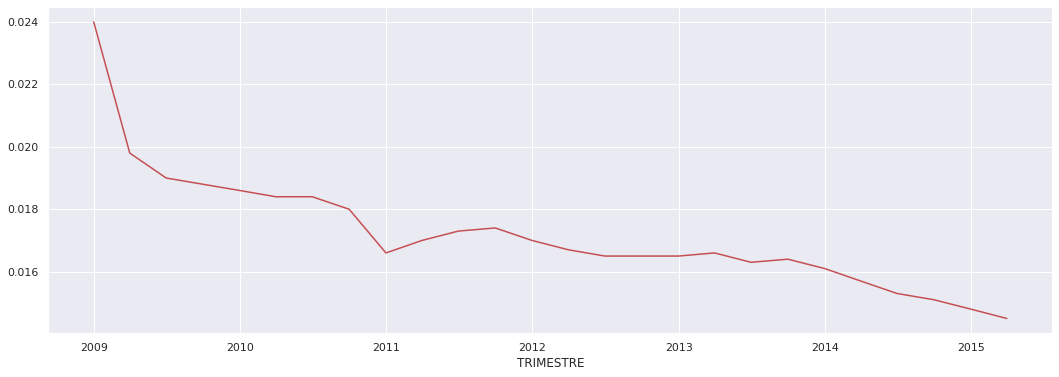

In [ ]:
sns.lineplot(x=df.index, y=Y.values,color= 'r')

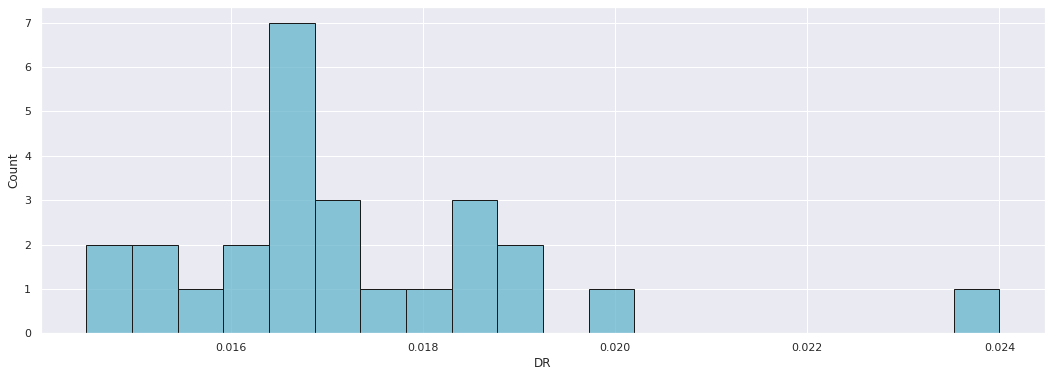

In [ ]:
sns.histplot(data=Y,bins = 20, color='c', edgecolor='k')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 0.02 and sigma = 0.00



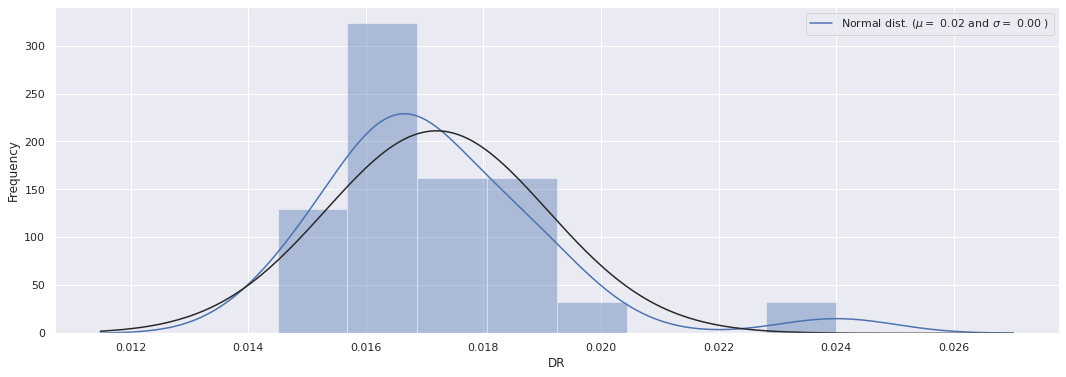

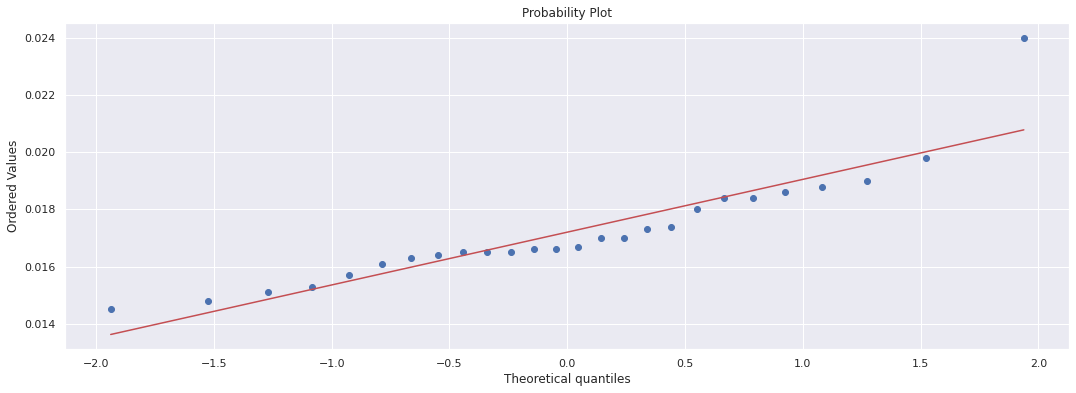

In [ ]:
sns.distplot(Y, fit=stats.norm);

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(Y)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(Y, plot=plt)
plt.show()

## Note d'octroi recalulée

In [ ]:
*col1, = map(lambda x: x+'_1', ['mean', 'median', 'p5', 'p10', 'p25', 'p75', 'p90','p95'])

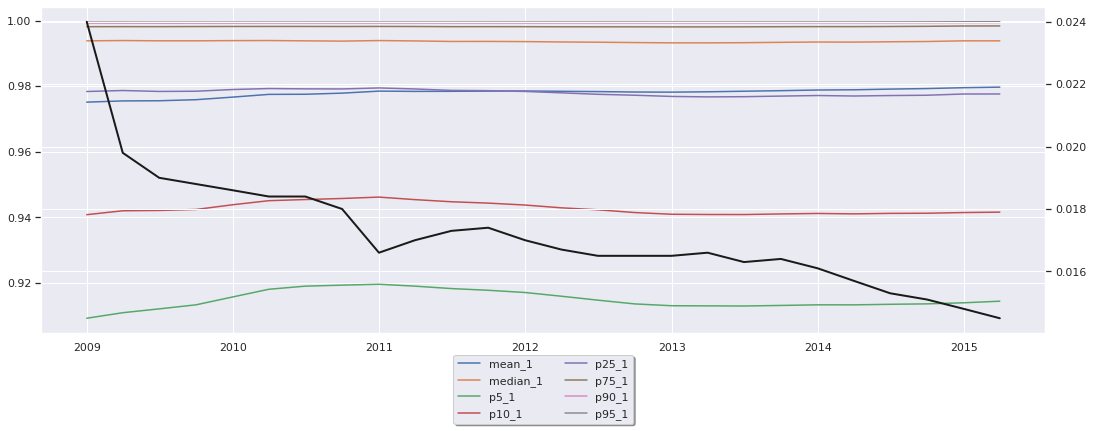

In [ ]:
fig, ax1 = plt.subplots()

for i in range(8):
  ax1.plot(df.index, df[col1[i]].values)
ax2 = ax1.twinx()
ax2.plot(df.index, Y.values, color='k', linewidth=2)
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True,ncol=2, labels=col1)
plt.show()

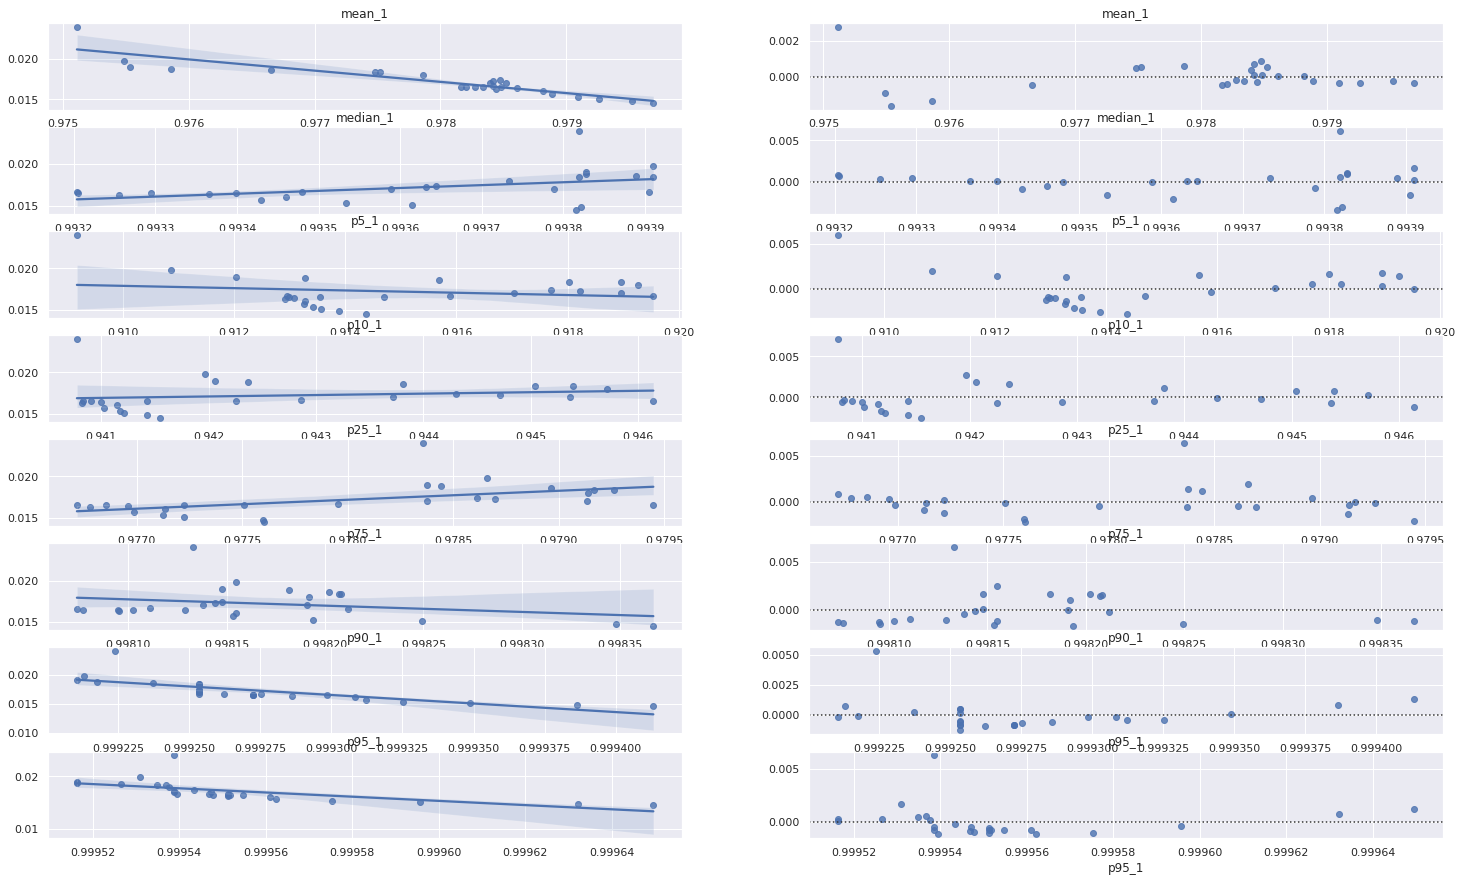

In [ ]:
fig, axes = plt.subplots(8,2,figsize=(25,15))
cols = col1
for i, col in enumerate(cols):
  sns.regplot(x=df[col].values,y=Y.values, ax=axes[i,0])
  sns.residplot(x=df[col],y=Y.values, ax=axes[i,1])
  axes[i,0].title.set_text(col)
  axes[i,1].title.set_text(col)
plt.

In [ ]:
col1

['mean_1', 'median_1', 'p5_1', 'p10_1', 'p25_1', 'p75_1', 'p90_1', 'p95_1']

In [ ]:
col_to_keep += ['mean_1','p95_1']


## Durée écoulée depuis le dernier impayé

In [ ]:
*col2, = map(lambda x: x+'_2', ['mean', 'median', 'p5', 'p10', 'p25', 'p75', 'p90','p95'])

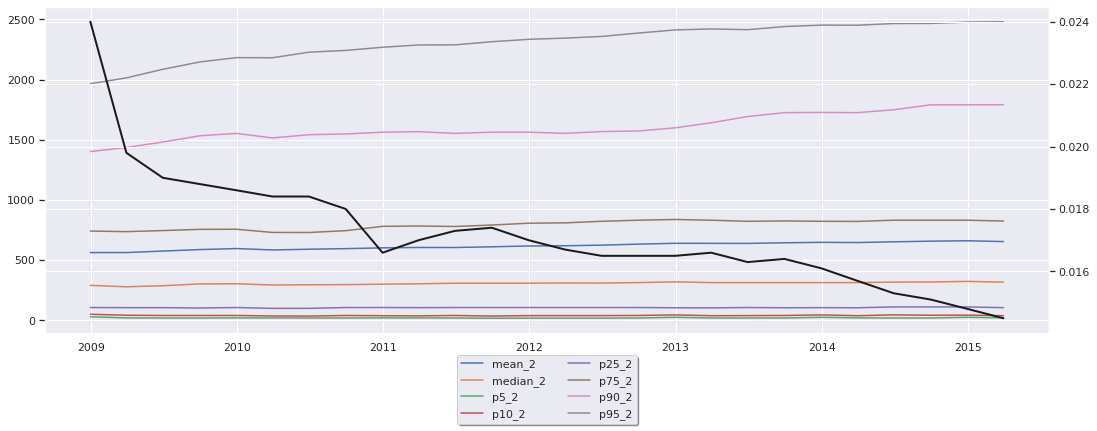

In [ ]:
fig, ax1 = plt.subplots()

for i in range(8):
  ax1.plot(df.index, df[col2[i]].values)
ax2 = ax1.twinx()
ax2.plot(df.index, Y.values, color='k', linewidth=2)
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True,ncol=2, labels=col2)
plt.show()

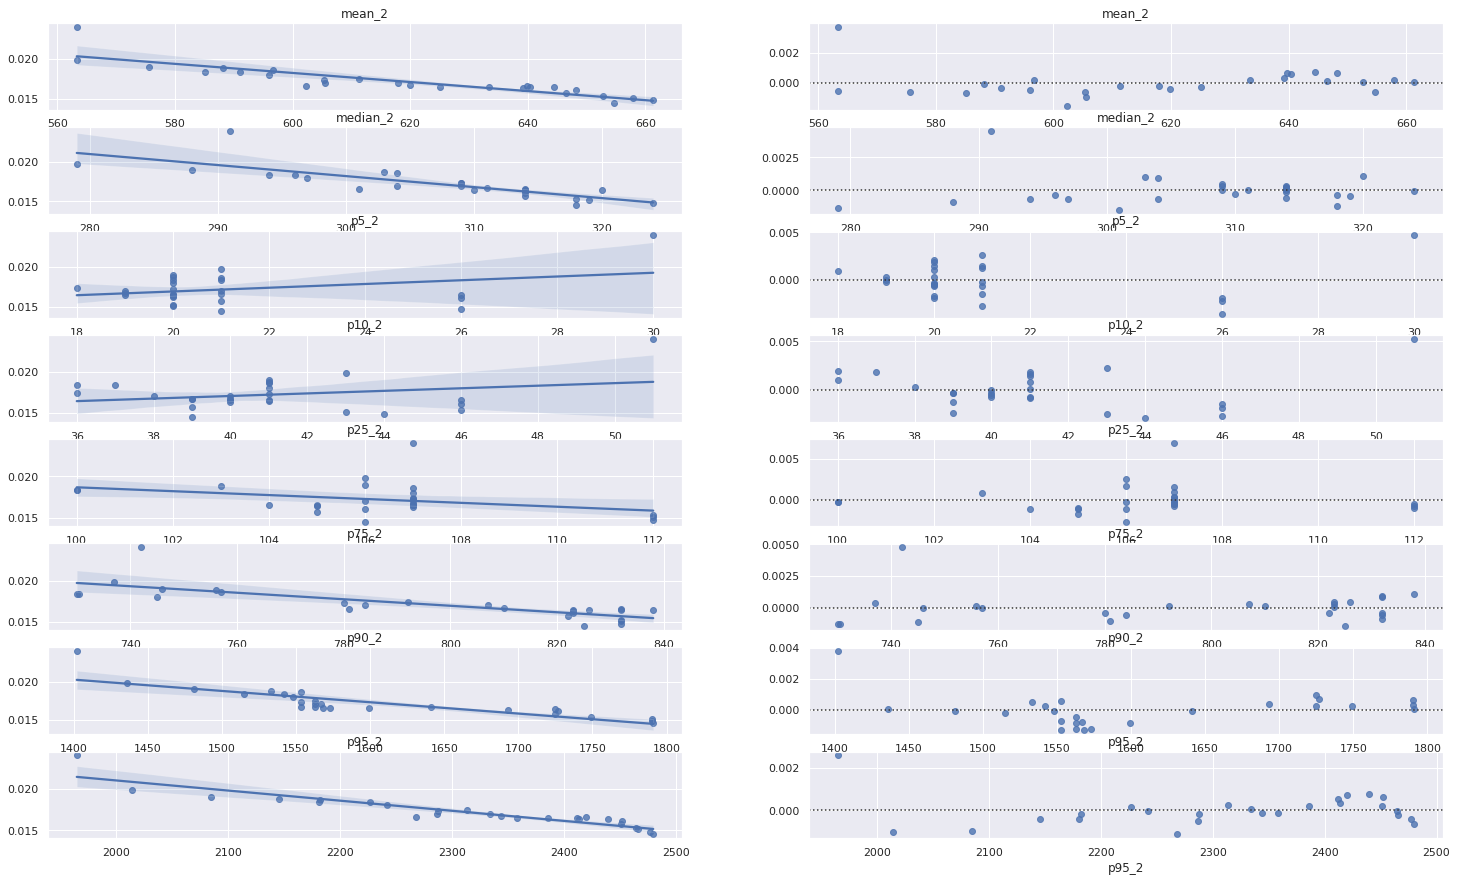

In [ ]:
fig, axes = plt.subplots(8,2,figsize=(25,15))
cols = col2
for i, col in enumerate(cols):
  sns.regplot(x=df[col].values,y=Y.values, ax=axes[i,0])
  sns.residplot(x=df[col],y=Y.values, ax=axes[i,1])
  axes[i,0].title.set_text(col)
  axes[i,1].title.set_text(col)

In [ ]:
col_to_keep += ['mean_2','p95_2']

## Durée de l'impayé encours


In [ ]:
*col3, = map(lambda x: x+'_3', ['mean', 'median', 'p5', 'p10', 'p25', 'p75', 'p90','p95'])

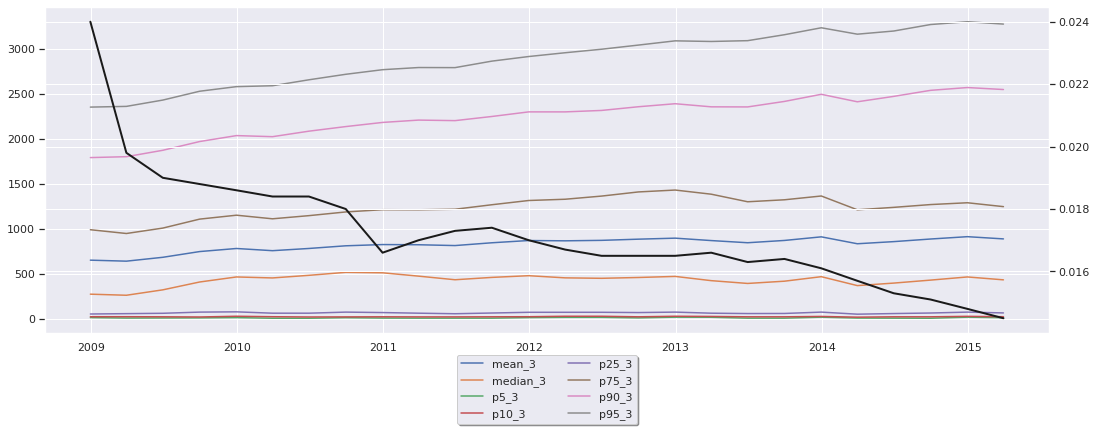

In [ ]:
fig, ax1 = plt.subplots()

for i in range(8):
  ax1.plot(df.index, df[col3[i]].values)
ax2 = ax1.twinx()
ax2.plot(df.index, Y.values, color='k', linewidth=2)
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True,ncol=2, labels=col3)
plt.show()

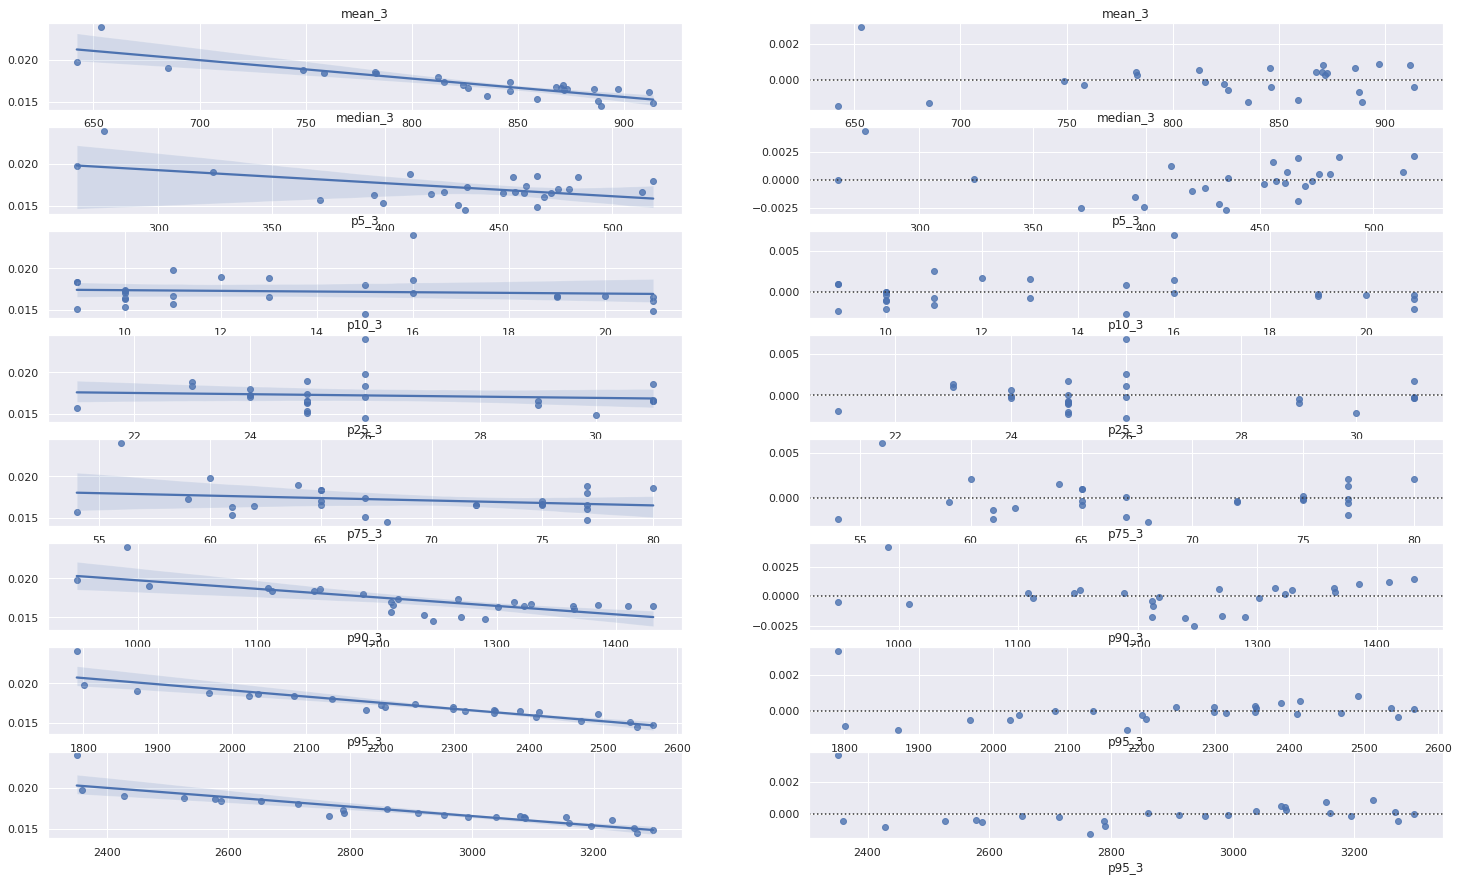

In [ ]:
fig, axes = plt.subplots(8,2,figsize=(25,15))
cols = col3
for i, col in enumerate(cols):
  sns.regplot(x=df[col].values,y=Y.values, ax=axes[i,0])
  sns.residplot(x=df[col],y=Y.values, ax=axes[i,1])
  axes[i,0].title.set_text(col)
  axes[i,1].title.set_text(col)

In [ ]:
col_to_keep += ['mean_3','p95_3']

## Durée maximale de l'impayé


In [ ]:
*col4, = map(lambda x: x+'_4', ['mean', 'median', 'p5', 'p10', 'p25', 'p75', 'p90','p95'])

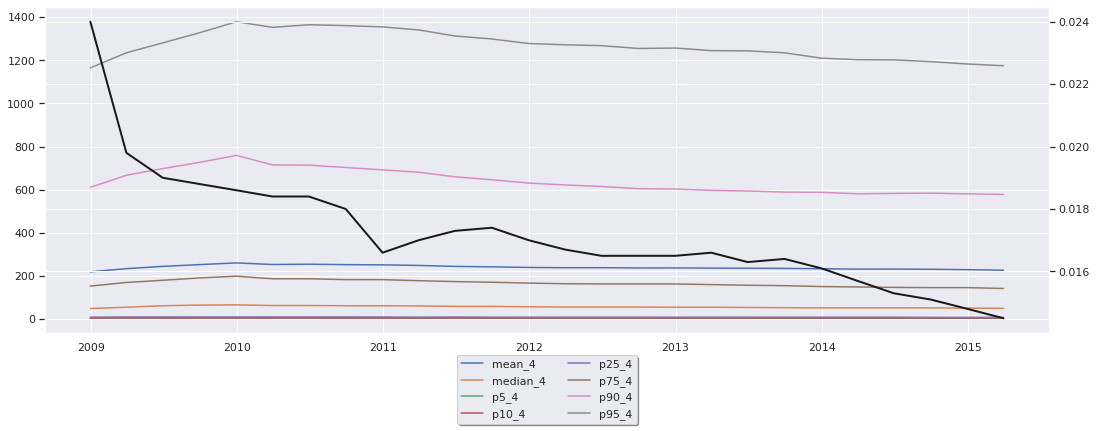

In [ ]:
fig, ax1 = plt.subplots()

for i in range(8):
  ax1.plot(df.index, df[col4[i]].values)
ax2 = ax1.twinx()
ax2.plot(df.index, Y.values, color='k', linewidth=2)
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True,ncol=2, labels=col4)
plt.show()

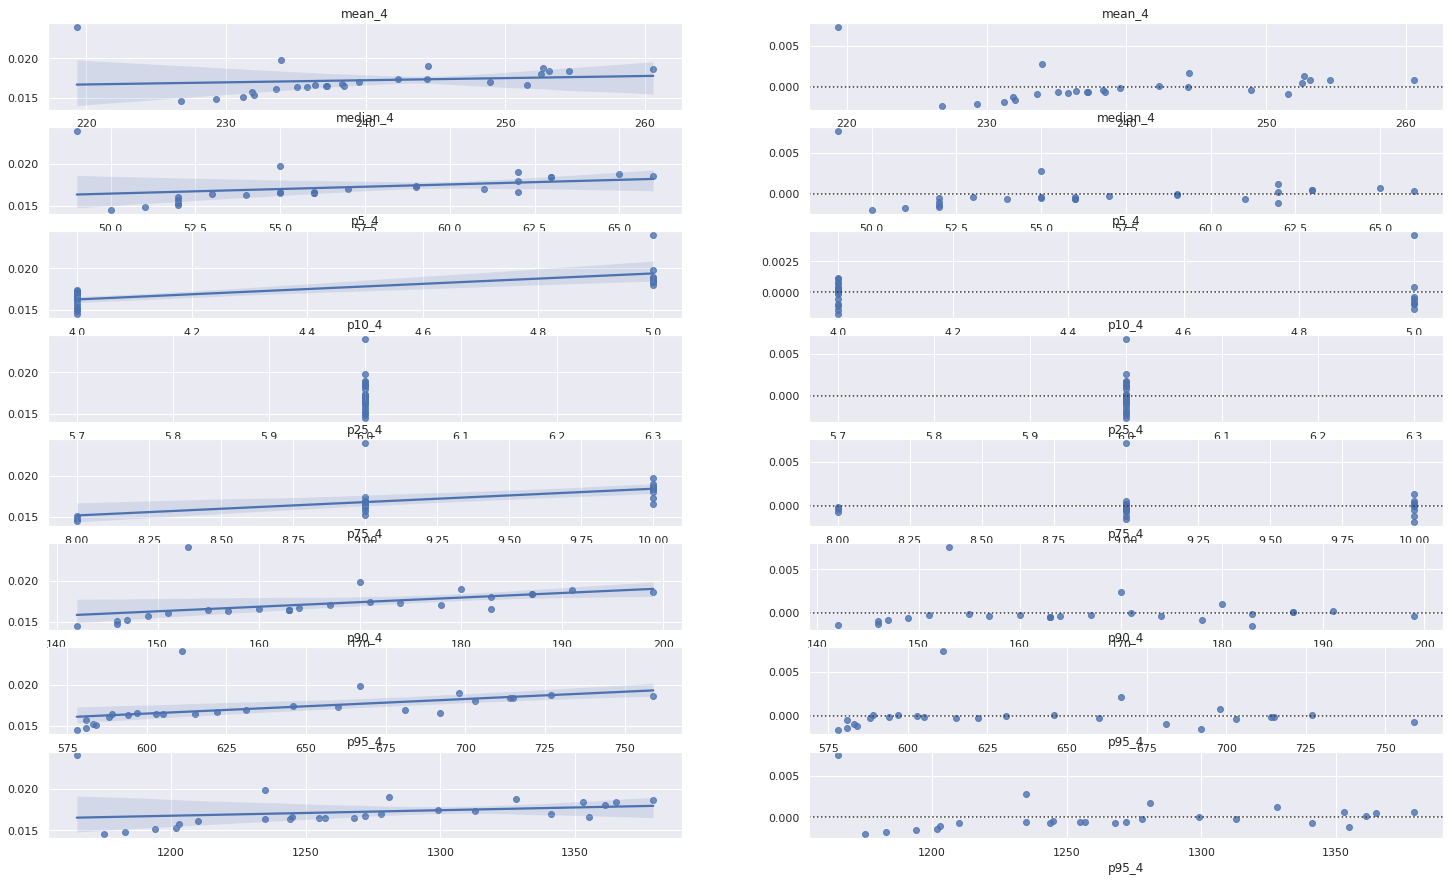

In [ ]:
fig, axes = plt.subplots(8,2,figsize=(25,15))
cols = col4
for i, col in enumerate(cols):
  sns.regplot(x=df[col].values,y=Y.values, ax=axes[i,0])
  sns.residplot(x=df[col],y=Y.values, ax=axes[i,1])
  axes[i,0].title.set_text(col)
  axes[i,1].title.set_text(col)

In [ ]:
col_to_keep += ['mean_4','p95_4']

## Créance après répartition solde créditeurs


In [ ]:
*col5, = map(lambda x: x+'_5', ['mean', 'median', 'p5', 'p10', 'p25', 'p75', 'p90','p95'])

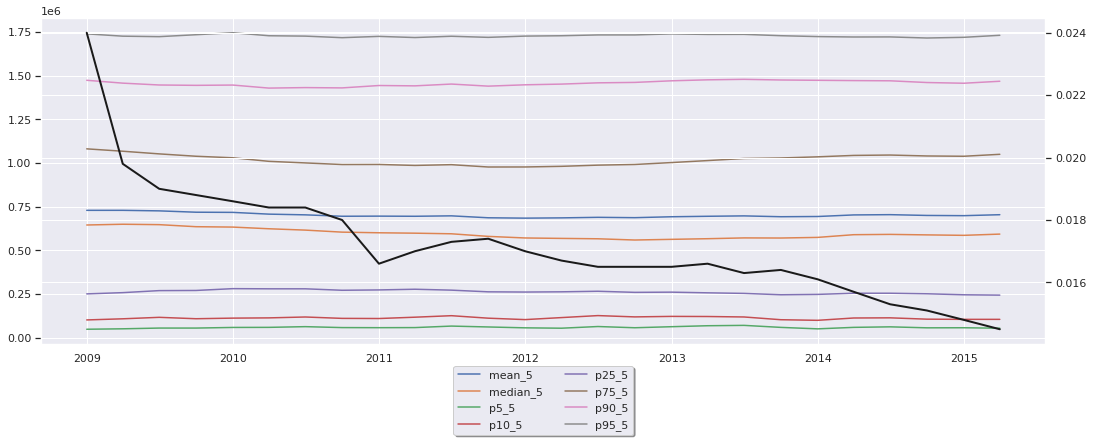

In [ ]:
fig, ax1 = plt.subplots()

for i in range(8):
  ax1.plot(df.index, df[col5[i]].values)
ax2 = ax1.twinx()
ax2.plot(df.index, Y.values, color='k', linewidth=2)
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True,ncol=2, labels=col5)
plt.show()

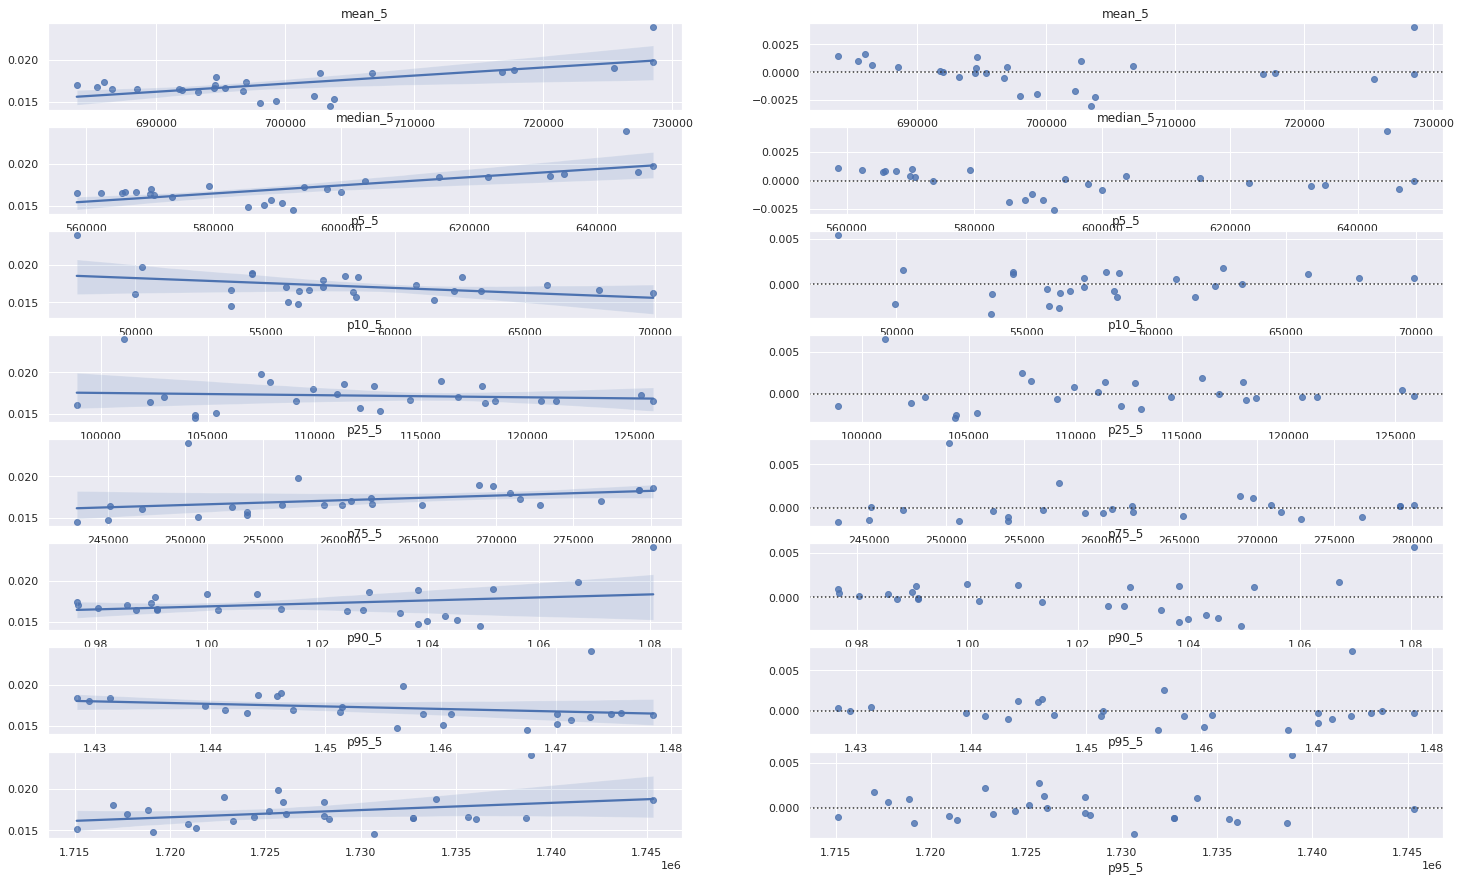

In [ ]:
fig, axes = plt.subplots(8,2,figsize=(25,15))
cols = col5
for i, col in enumerate(cols):
  sns.regplot(x=df[col].values,y=Y.values, ax=axes[i,0])
  sns.residplot(x=df[col],y=Y.values, ax=axes[i,1])
  axes[i,0].title.set_text(col)
  axes[i,1].title.set_text(col)

In [ ]:
col_to_keep += ['mean_5','p95_5']

## Ratio nombre d'incidents régularisés enregistrés depuis la date d'entrée en gestion


In [ ]:
*col6, = map(lambda x: x+'_6', ['mean', 'median', 'p5', 'p10', 'p25', 'p75', 'p90','p95'])

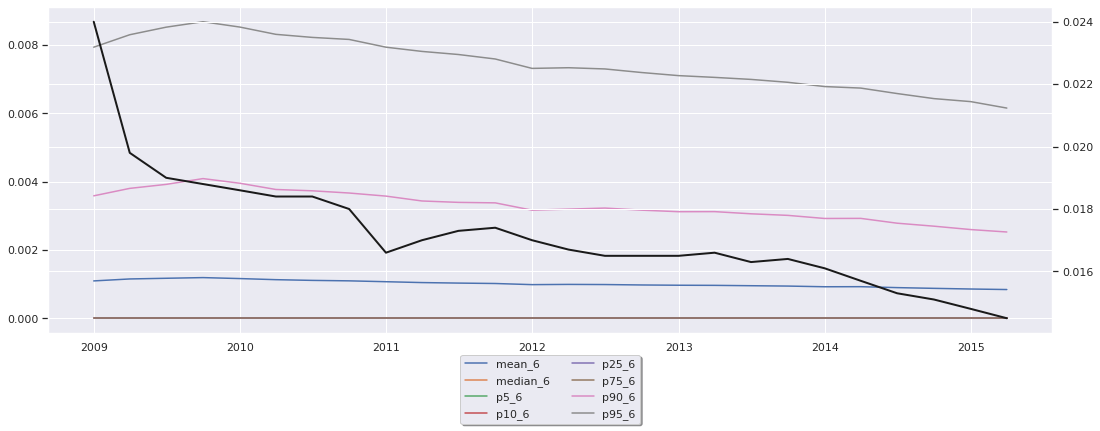

In [ ]:
fig, ax1 = plt.subplots()

for i in range(8):
  ax1.plot(df.index, df[col6[i]].values)
ax2 = ax1.twinx()
ax2.plot(df.index, Y.values, color='k', linewidth=2)
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True,ncol=2, labels=col6)
plt.show()

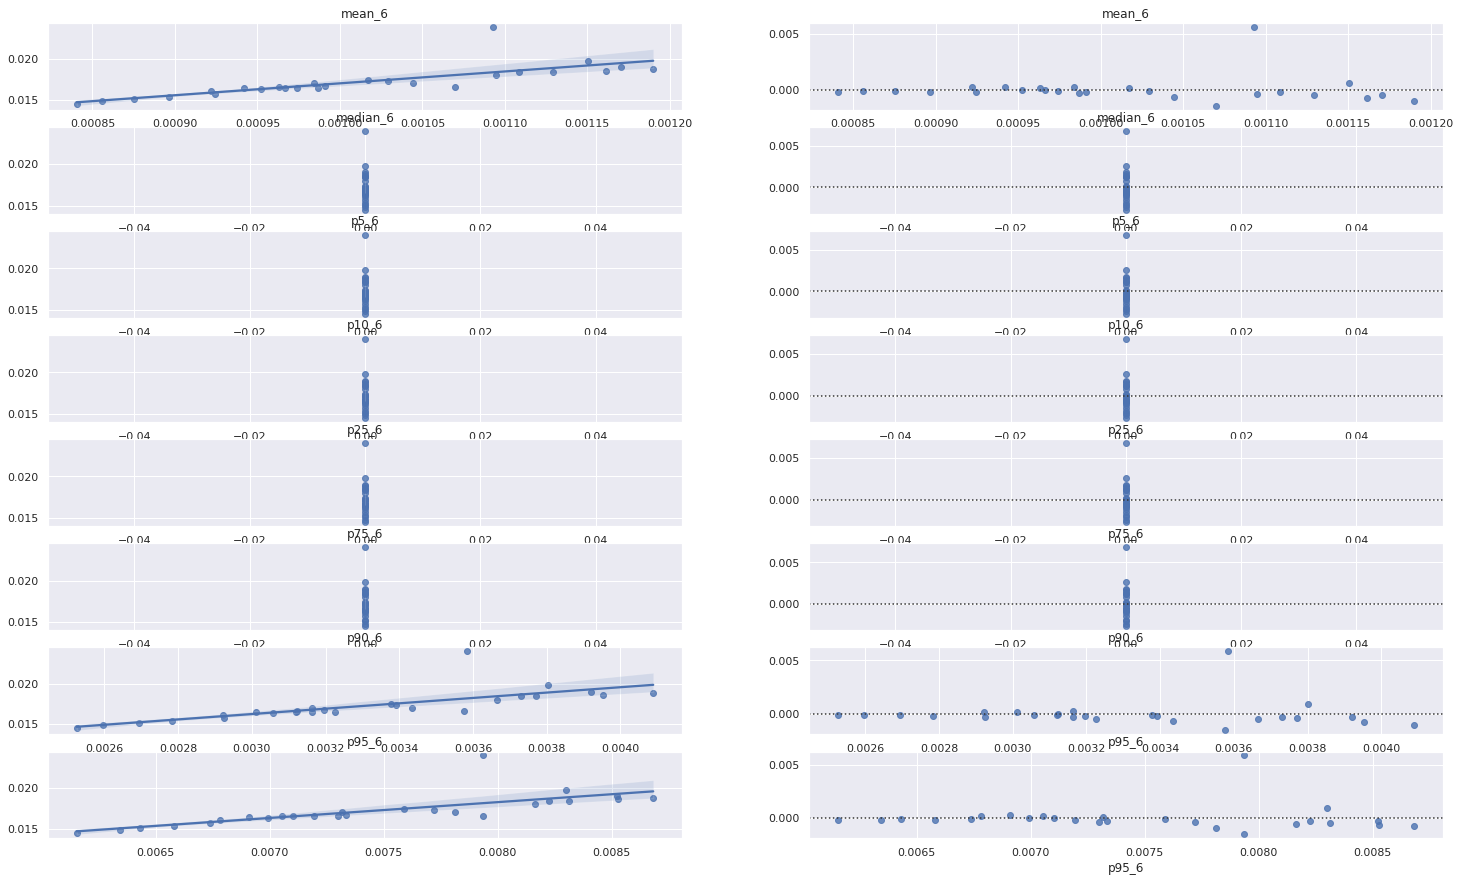

In [ ]:
fig, axes = plt.subplots(8,2,figsize=(25,15))
cols = col6
for i, col in enumerate(cols):
  sns.regplot(x=df[col].values,y=Y.values, ax=axes[i,0])
  sns.residplot(x=df[col],y=Y.values, ax=axes[i,1])
  axes[i,0].title.set_text(col)
  axes[i,1].title.set_text(col)

In [ ]:
col_to_keep += ['mean_6','p95_6']

## Ratio rang du premier impayé régularisé par rapport à la durée prévue du contrat

In [ ]:
*col7, = map(lambda x: x+'_7', ['mean', 'median', 'p5', 'p10', 'p25', 'p75', 'p90','p95'])

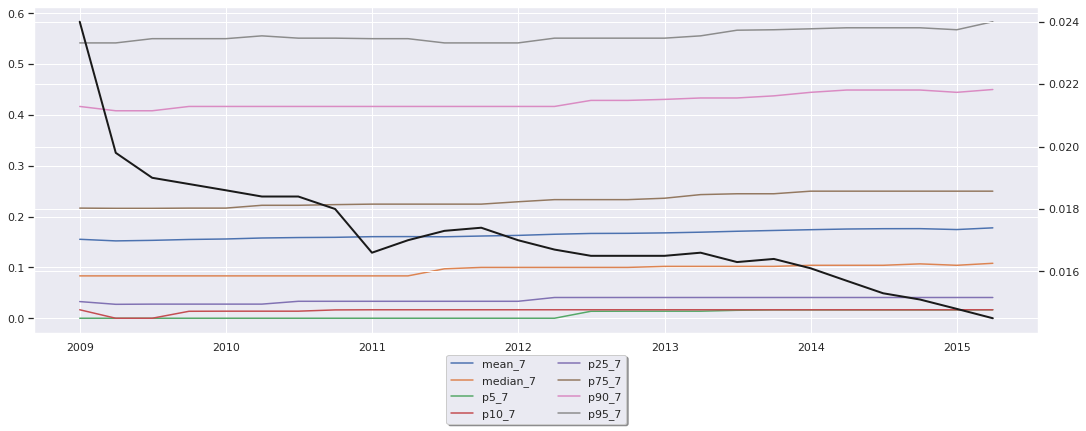

In [ ]:
fig, ax1 = plt.subplots()

for i in range(8):
  ax1.plot(df.index, df[col7[i]].values)
ax2 = ax1.twinx()
ax2.plot(df.index, Y.values, color='k', linewidth=2)
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True,ncol=2, labels=col7)
plt.show()

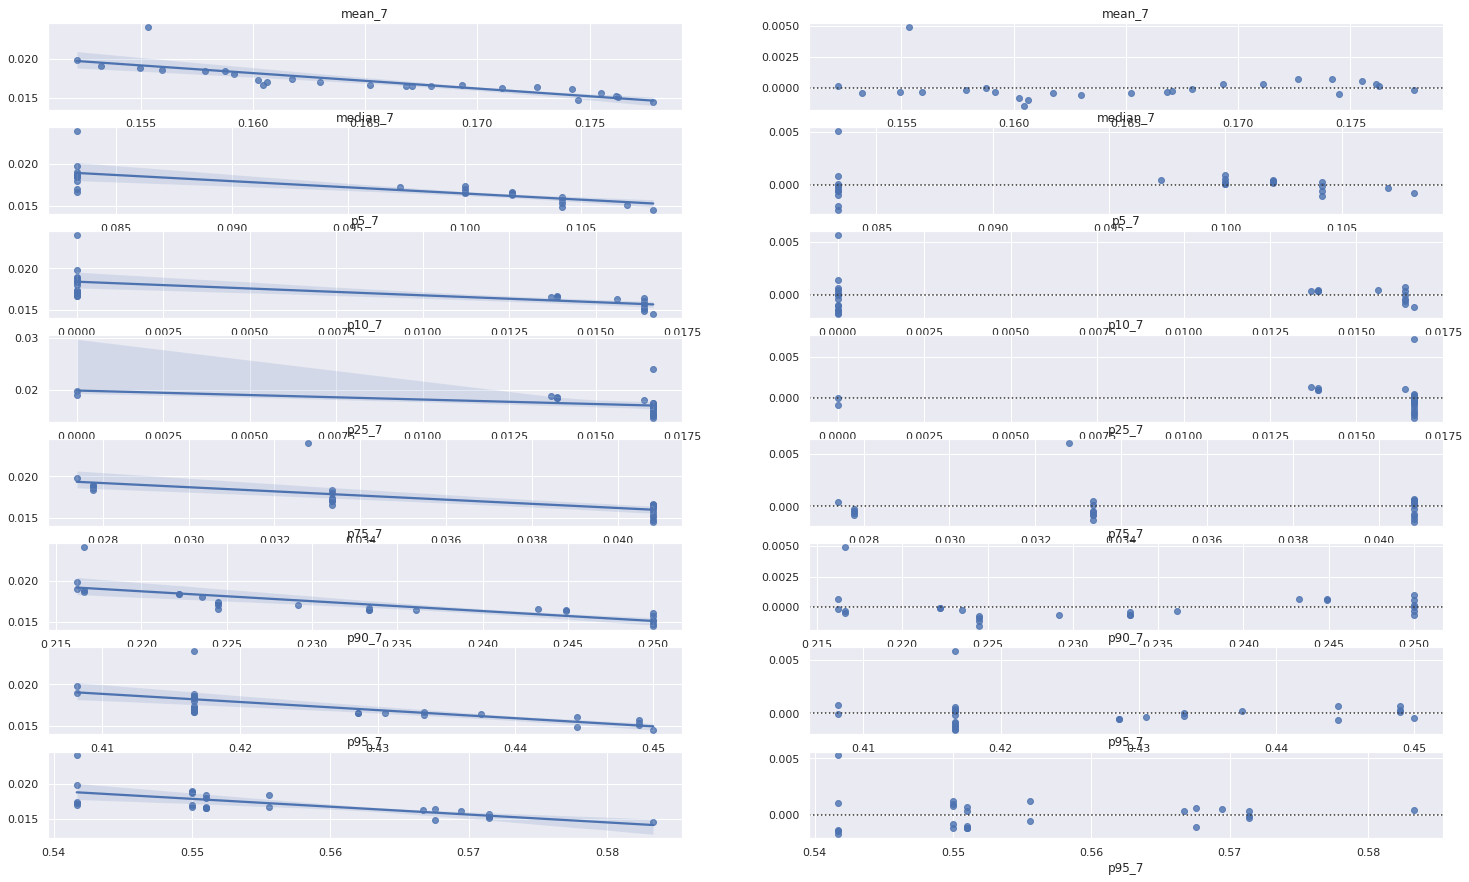

In [ ]:
fig, axes = plt.subplots(8,2,figsize=(25,15))
cols = col7
for i, col in enumerate(cols):
  sns.regplot(x=df[col].values,y=Y.values, ax=axes[i,0])
  sns.residplot(x=df[col],y=Y.values, ax=axes[i,1])
  axes[i,0].title.set_text(col)
  axes[i,1].title.set_text(col)

In [ ]:
col_to_keep += ['mean_7','p95_7']

## Pourcentage apport

In [ ]:
*col8, = map(lambda x: x+'_8', ['mean', 'median', 'p5', 'p10', 'p25', 'p75', 'p90','p95'])

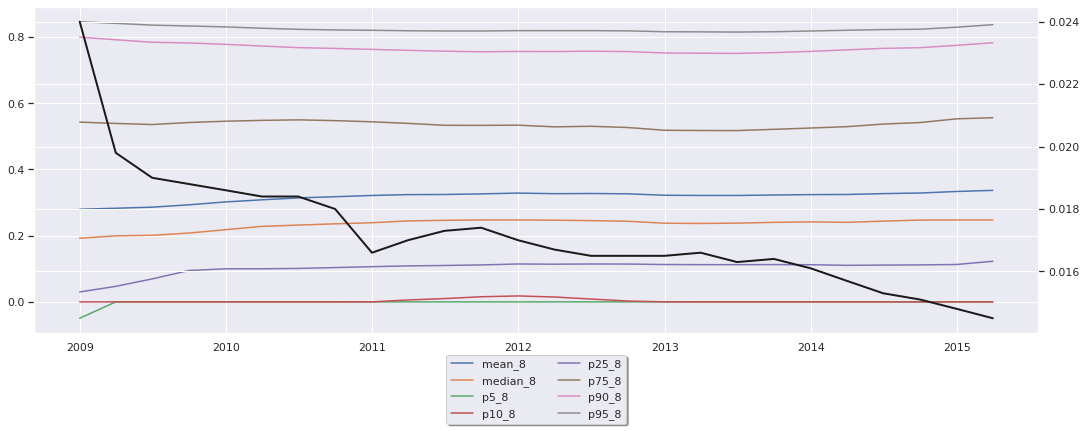

In [ ]:
fig, ax1 = plt.subplots()

for i in range(8):
  ax1.plot(df.index, df[col8[i]].values)
ax2 = ax1.twinx()
ax2.plot(df.index, Y.values, color='k', linewidth=2)
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True,ncol=2, labels=col8)
plt.show()

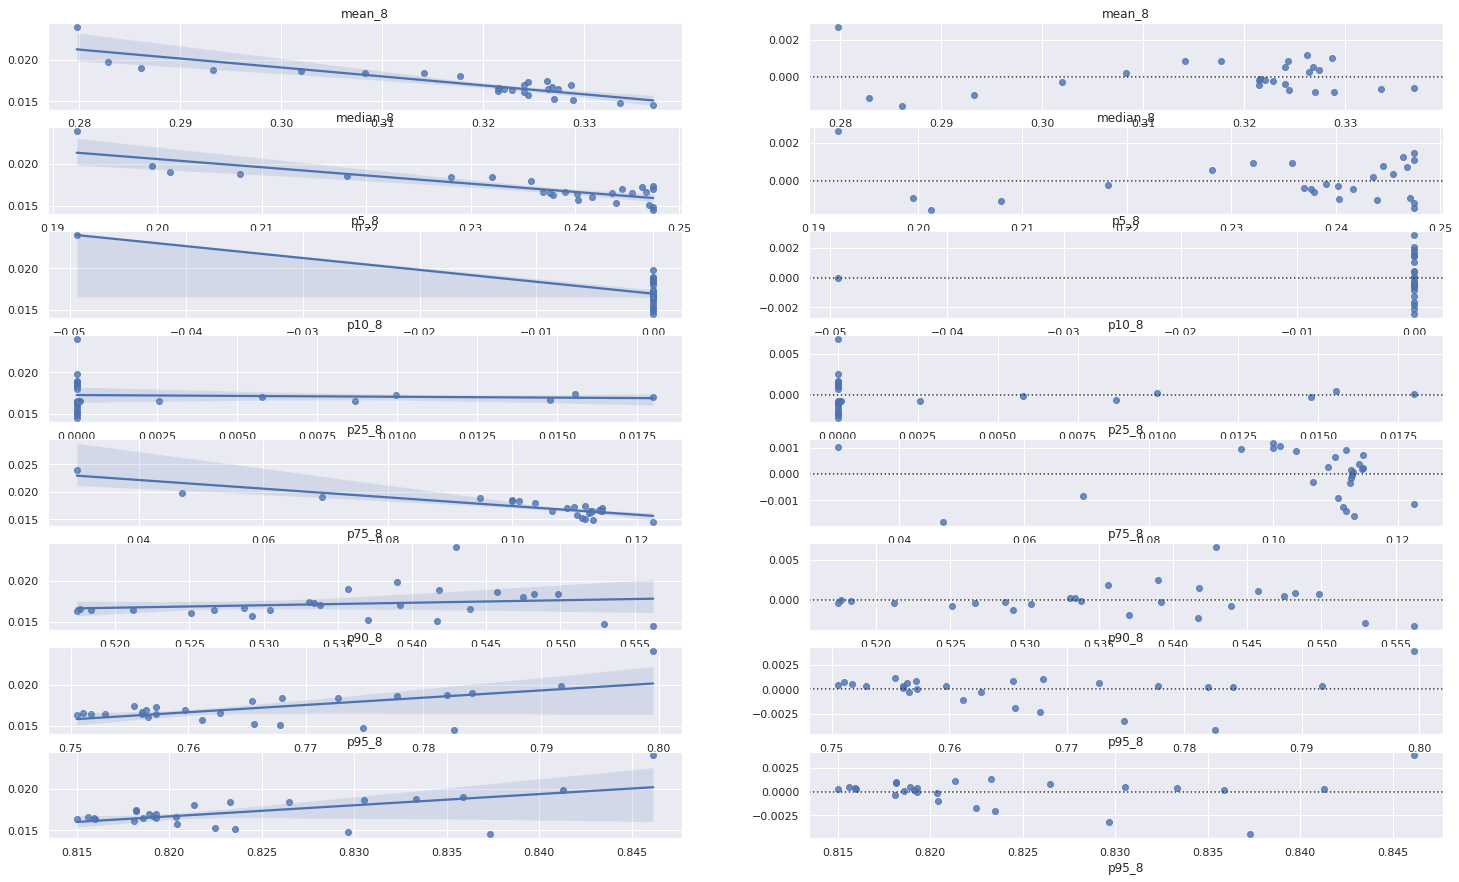

In [ ]:
fig, axes = plt.subplots(8,2,figsize=(25,15))
cols = col8
for i, col in enumerate(cols):
  sns.regplot(x=df[col].values,y=Y.values, ax=axes[i,0])
  sns.residplot(x=df[col],y=Y.values, ax=axes[i,1])
  axes[i,0].title.set_text(col)
  axes[i,1].title.set_text(col)

In [ ]:
col_to_keep += ['mean_8','p95_8']

## Type de client

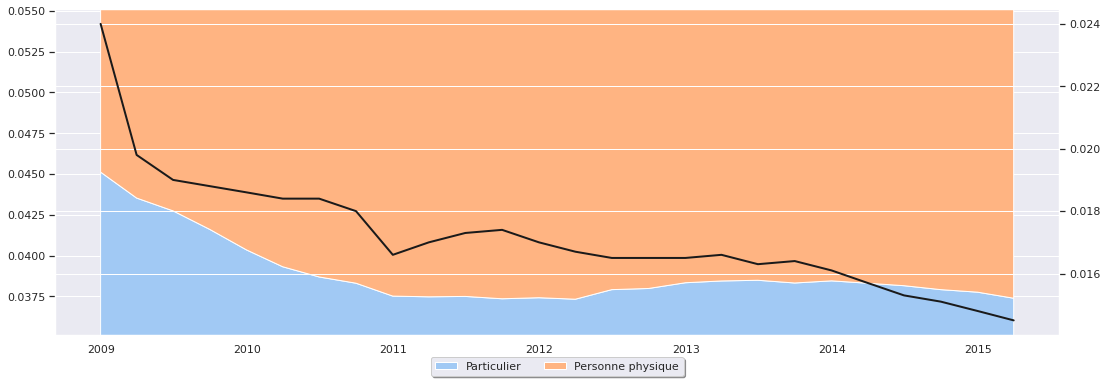

In [ ]:
d1 = df['CD_TY_CLI_RCI_1'].values
d2 = df['CD_TY_CLI_RCI_2'].values
colors = sns.color_palette(palette="pastel", n_colors = 2, )

fig, ax1 = plt.subplots()
ax1.stackplot(df.index, d1, d2, colors =colors)
half_size_band = 0.01
ax1.set_ylim([max(d1) - half_size_band, max(d1) + half_size_band])

ax2 = ax1.twinx()
ax2.plot(df.index, Y.values, color='k', linewidth=2)

ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True,ncol=2, labels=['Particulier','Personne physique'])
plt.show()

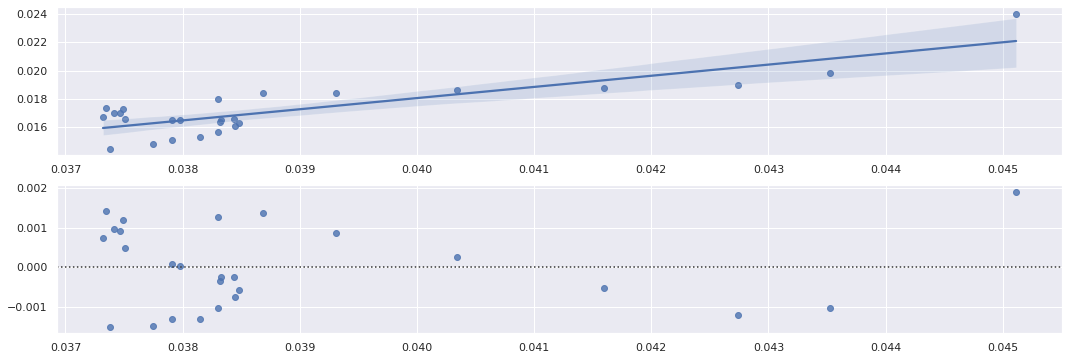

In [ ]:
fig, axes = plt.subplots(2)
sns.regplot(x=df['CD_TY_CLI_RCI_1'].values,y=Y.values, ax=axes[0])
sns.residplot(x=df['CD_TY_CLI_RCI_1'].values,y=Y.values, ax=axes[1])

In [ ]:
#col_to_keep += ['CD_TY_CLI_RCI_1']
#col_to_keep.remove('CD_TY_CLI_RCI_1')

## Mode d'habitation

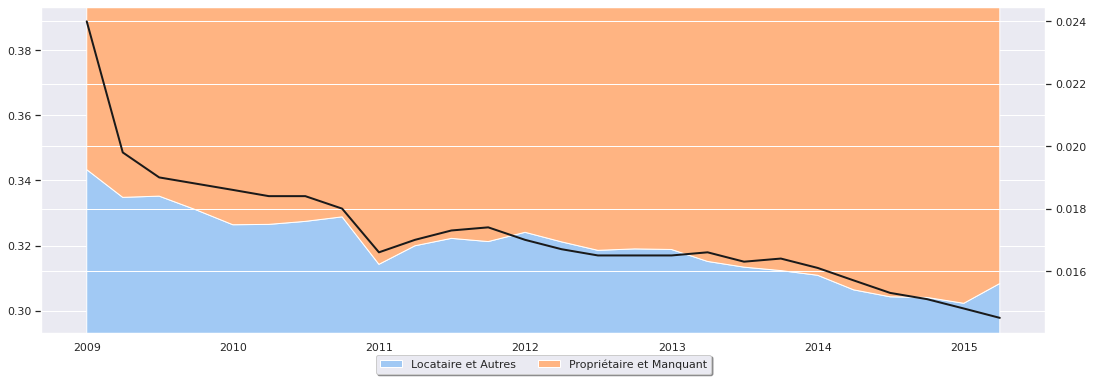

In [ ]:
d1 = df['CD_MOD_HABI_1'].values
d2 = df['CD_MOD_HABI_2'].values
colors = sns.color_palette(palette="pastel", n_colors = 2, )

fig, ax1 = plt.subplots()
ax1.stackplot(df.index, d1, d2, colors =colors)
half_size_band = 0.05
ax1.set_ylim([max(d1) - half_size_band, max(d1) + half_size_band])

ax2 = ax1.twinx()
ax2.plot(df.index, Y.values, color='k', linewidth=2)

ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True,ncol=2, labels=['Locataire et Autres','Propriétaire et Manquant'])
plt.show()

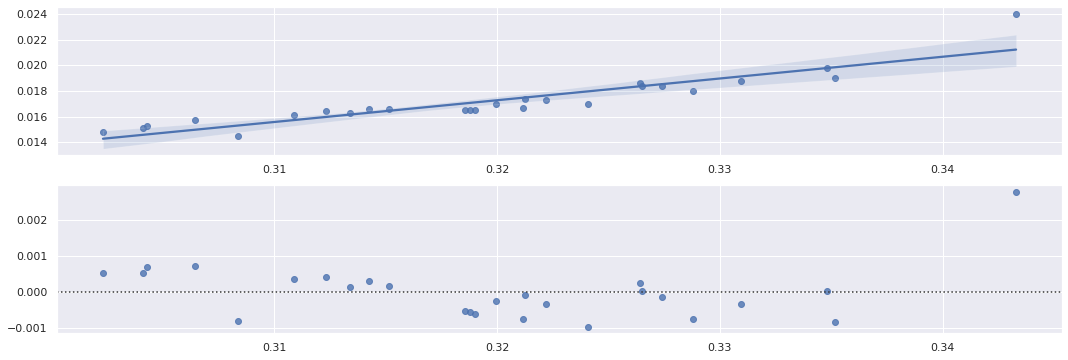

In [ ]:
fig, axes = plt.subplots(2)
sns.regplot(x=df['CD_MOD_HABI_1'].values,y=Y.values, ax=axes[0])
sns.residplot(x=df['CD_MOD_HABI_1'].values,y=Y.values, ax=axes[1])

In [ ]:
col_to_keep += ['CD_MOD_HABI_1']

## Etat civil

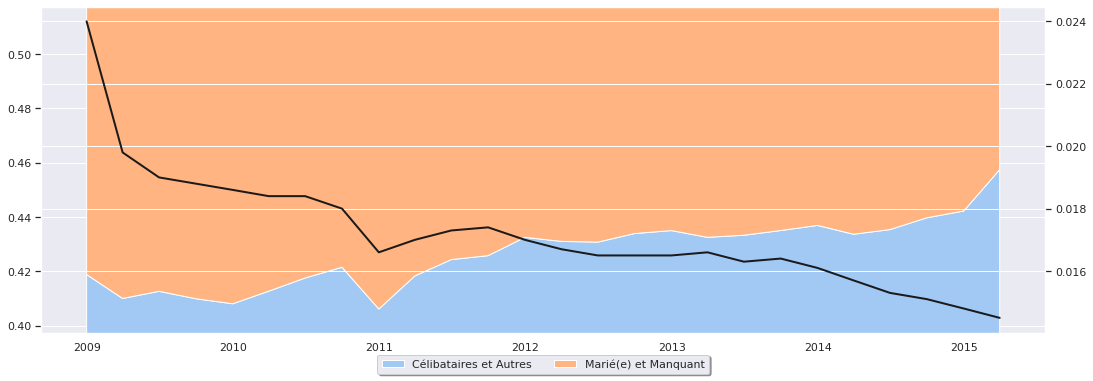

In [ ]:
d1 = df['CD_ETA_CIV_1'].values
d2 = df['CD_ETA_CIV_2'].values
colors = sns.color_palette(palette="pastel", n_colors = 2, )

fig, ax1 = plt.subplots()
ax1.stackplot(df.index, d1, d2, colors =colors)
half_size_band = 0.06
ax1.set_ylim([max(d1) - half_size_band, max(d1) + half_size_band])

ax2 = ax1.twinx()
ax2.plot(df.index, Y.values, color='k', linewidth=2)

ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True,ncol=2, labels=['Célibataires et Autres','Marié(e) et Manquant'])
plt.show()

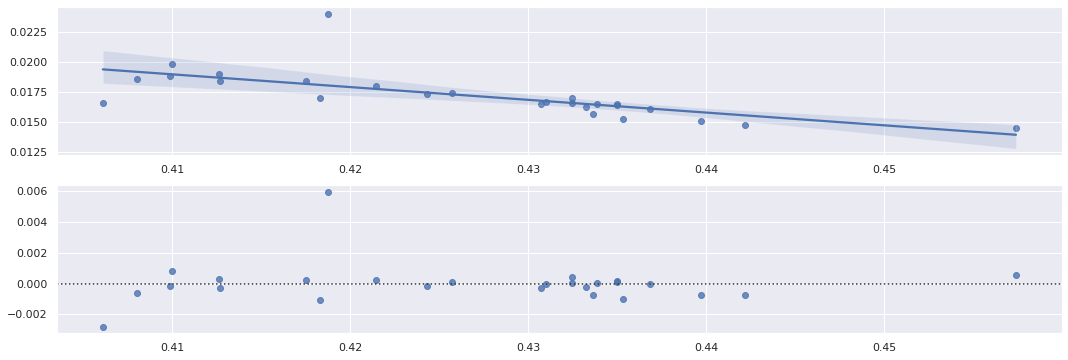

In [ ]:
fig, axes = plt.subplots(2)
sns.regplot(x=df['CD_ETA_CIV_1'].values,y=Y.values, ax=axes[0])
sns.residplot(x=df['CD_ETA_CIV_1'].values,y=Y.values, ax=axes[1])

In [ ]:
col_to_keep += ['CD_ETA_CIV_1']

## Code qualité du véhicule

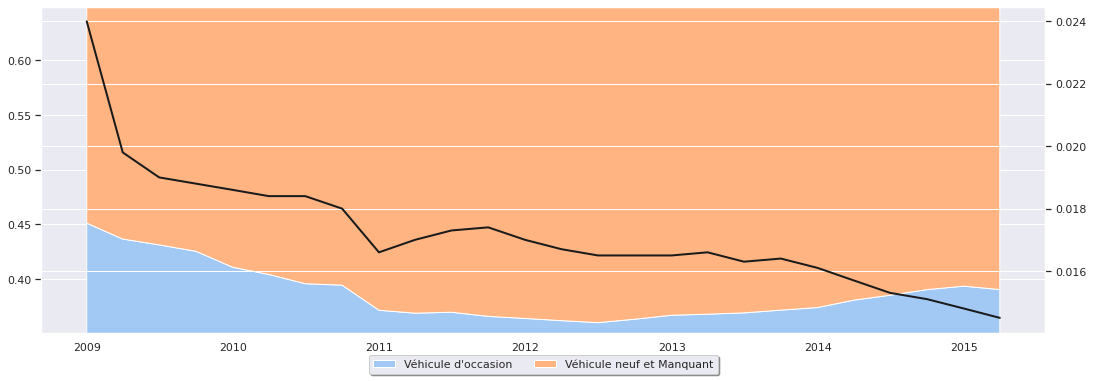

In [ ]:
d1 = df['CD_QUAL_VEH_1'].values
d2 = df['CD_QUAL_VEH_2'].values
colors = sns.color_palette(palette="pastel", n_colors = 2, )

fig, ax1 = plt.subplots()
ax1.stackplot(df.index, d1, d2, colors =colors)
half_size_band = 0.1
ax1.set_ylim([max(d1) - half_size_band, min(d2) + half_size_band])

ax2 = ax1.twinx()
ax2.plot(df.index, Y.values, color='k', linewidth=2)

ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True,ncol=2, labels=['Véhicule d\'occasion','Véhicule neuf et Manquant'])
plt.show()

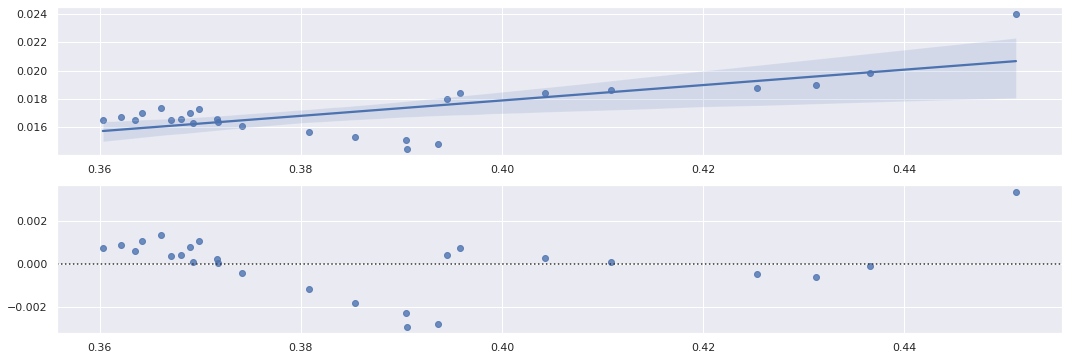

In [ ]:
fig, axes = plt.subplots(2)
sns.regplot(x=df['CD_QUAL_VEH_1'].values,y=Y.values, ax=axes[0])
sns.residplot(x=df['CD_QUAL_VEH_1'].values,y=Y.values, ax=axes[1])

In [ ]:
#col_to_keep += ['CD_QUAL_VEH_1']
#col_to_keep.remove('CD_QUAL_VEH_1')

## Profession

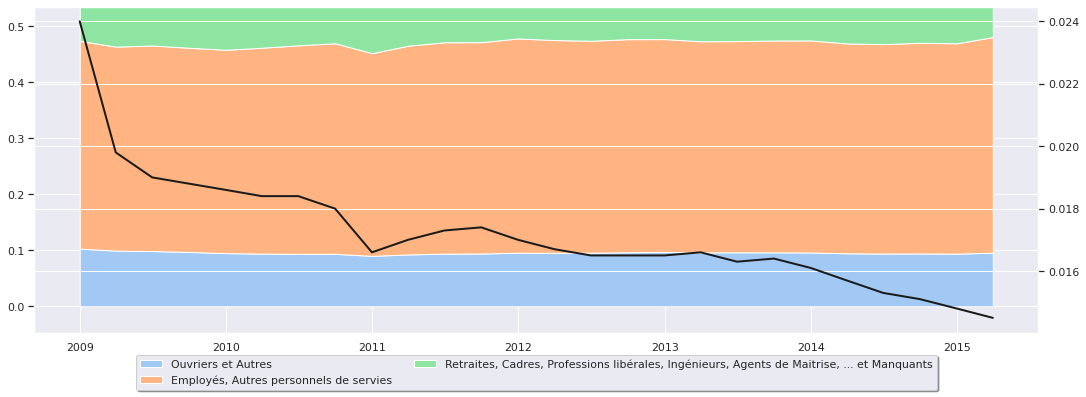

In [ ]:
d1 = df['CD_PROF_1'].values
d2 = df['CD_PROF_2'].values
d3 = df['CD_PROF_3'].values
colors = sns.color_palette(palette="pastel", n_colors = 3, )

fig, ax1 = plt.subplots()
ax1.stackplot(df.index, d1, d2, d3, colors =colors)
half_size_band = 0.15
ax1.set_ylim([max(d1) - half_size_band, max(d2) + half_size_band])

ax2 = ax1.twinx()
ax2.plot(df.index, Y.values, color='k', linewidth=2)

ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True,ncol=2, 
           labels=['Ouvriers et Autres','Employés, Autres personnels de servies','Retraites, Cadres, Professions libérales, Ingénieurs, Agents de Maitrise, ... et Manquants'])
plt.show()

## Macro

**About PIB**

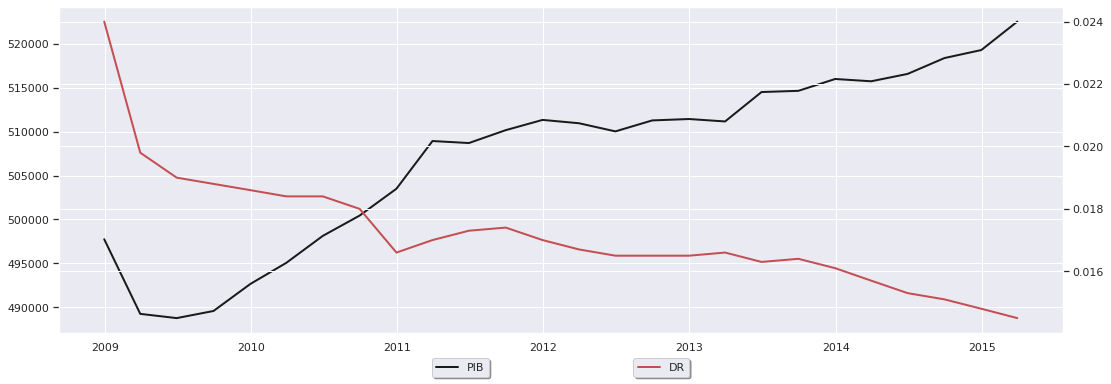

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot(df.index, df['PIB'].values, color='k', linewidth=2)

ax2 = ax1.twinx()
ax2.plot(df.index, Y.values, color='r', linewidth=2)

ax1.legend(loc='upper center', bbox_to_anchor=(0.4, -0.06),
          fancybox=True, shadow=True,ncol=2, 
           labels=['PIB'])
ax2.legend(loc='upper center', bbox_to_anchor=(0.6, -0.06),
          fancybox=True, shadow=True,ncol=2, 
           labels=['DR'])
plt.show()

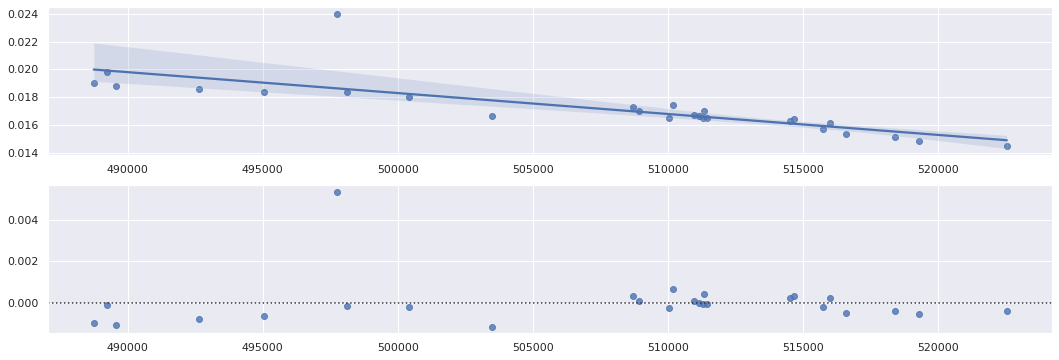

In [ ]:
fig, axes = plt.subplots(2)
sns.regplot(x=df['PIB'].values,y=Y.values, ax=axes[0])
sns.residplot(x=df['PIB'].values,y=Y.values, ax=axes[1])

In [ ]:
col_to_keep += ['PIB']

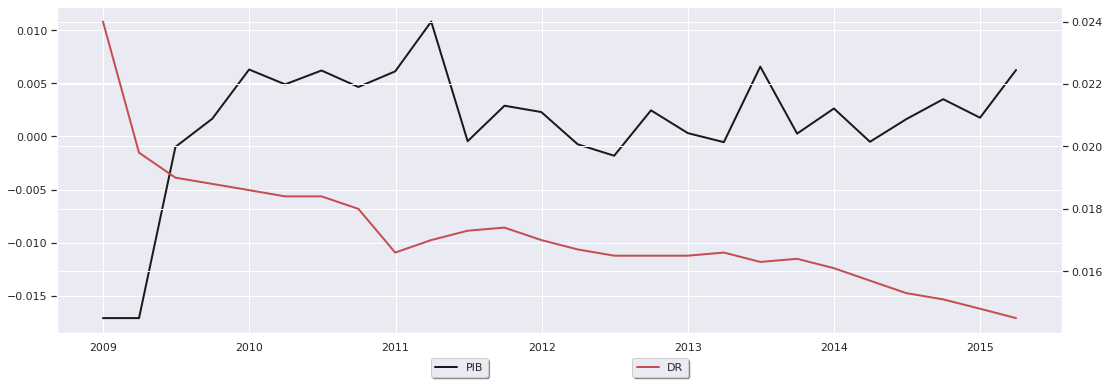

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot(df.index, df['PIB'].pct_change().bfill().values, color='k', linewidth=2)

ax2 = ax1.twinx()
ax2.plot(df.index, Y.values, color='r', linewidth=2)

ax1.legend(loc='upper center', bbox_to_anchor=(0.4, -0.06),
          fancybox=True, shadow=True,ncol=2, 
           labels=['PIB'])
ax2.legend(loc='upper center', bbox_to_anchor=(0.6, -0.06),
          fancybox=True, shadow=True,ncol=2, 
           labels=['DR'])
plt.show()

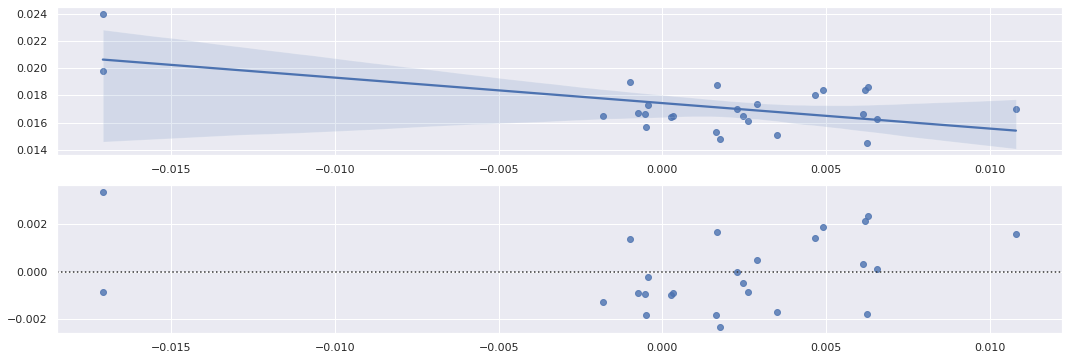

In [ ]:
fig, axes = plt.subplots(2)
sns.regplot(x=df['PIB'].pct_change().bfill().values,y=Y.values, ax=axes[0])
sns.residplot(x=df['PIB'].pct_change().bfill().values,y=Y.values, ax=axes[1])

**About Inflation**

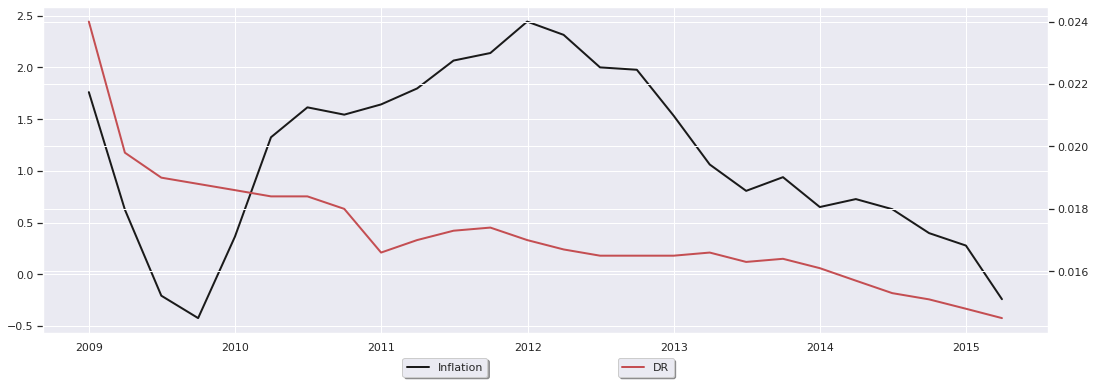

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot(df.index, df['Inflation'].values, color='k', linewidth=2)

ax2 = ax1.twinx()
ax2.plot(df.index, Y.values, color='r', linewidth=2)

ax1.legend(loc='upper center', bbox_to_anchor=(0.4, -0.06),
          fancybox=True, shadow=True,ncol=2, 
           labels=['Inflation'])
ax2.legend(loc='upper center', bbox_to_anchor=(0.6, -0.06),
          fancybox=True, shadow=True,ncol=2, 
           labels=['DR'])
plt.show()

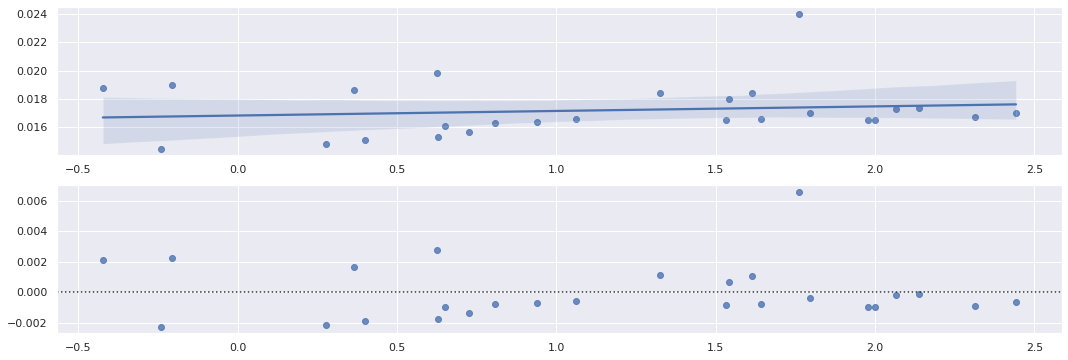

In [ ]:
fig, axes = plt.subplots(2)
sns.regplot(x=df['Inflation'].values,y=Y.values, ax=axes[0])
sns.residplot(x=df['Inflation'].values,y=Y.values, ax=axes[1])

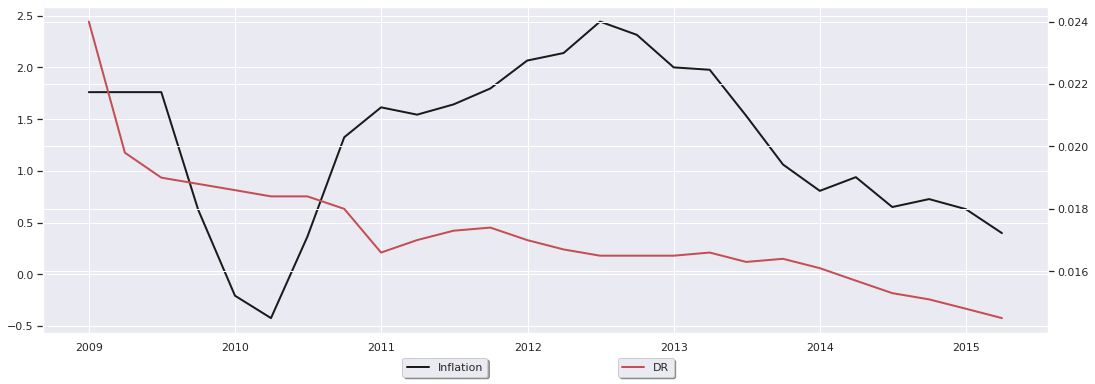

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot(df.index, df['Inflation'].shift(2).bfill().values, color='k', linewidth=2)

ax2 = ax1.twinx()
ax2.plot(df.index, Y.values, color='r', linewidth=2)

ax1.legend(loc='upper center', bbox_to_anchor=(0.4, -0.06),
          fancybox=True, shadow=True,ncol=2, 
           labels=['Inflation'])
ax2.legend(loc='upper center', bbox_to_anchor=(0.6, -0.06),
          fancybox=True, shadow=True,ncol=2, 
           labels=['DR'])
plt.show()

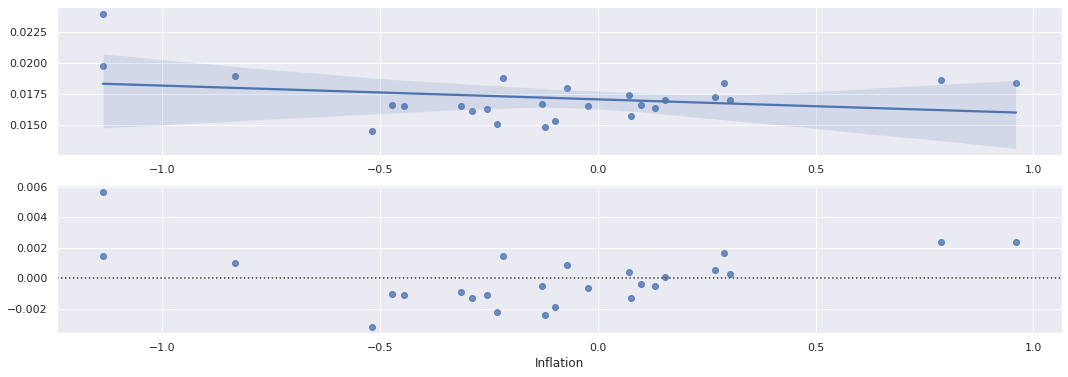

In [ ]:
fig, axes = plt.subplots(2)
sns.regplot(x=df['Inflation'].diff(1).bfill().values,y=Y.values, ax=axes[0])
sns.residplot(x=df['Inflation'].diff(1).bfill(),y=Y.values, ax=axes[1])

**Taux chomage**

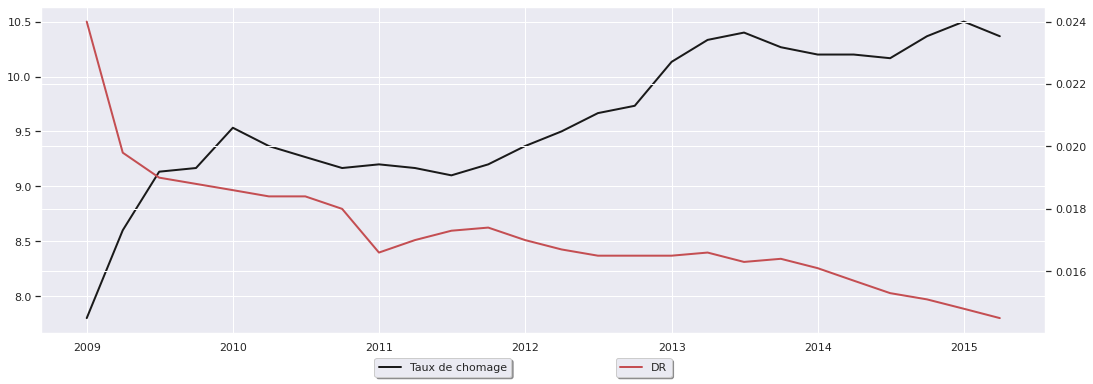

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot(df.index, df['Tx_cho'].values, color='k', linewidth=2)

ax2 = ax1.twinx()
ax2.plot(df.index, Y.values, color='r', linewidth=2)

ax1.legend(loc='upper center', bbox_to_anchor=(0.4, -0.06),
          fancybox=True, shadow=True,ncol=2, 
           labels=['Taux de chomage'])
ax2.legend(loc='upper center', bbox_to_anchor=(0.6, -0.06),
          fancybox=True, shadow=True,ncol=2, 
           labels=['DR'])
plt.show()

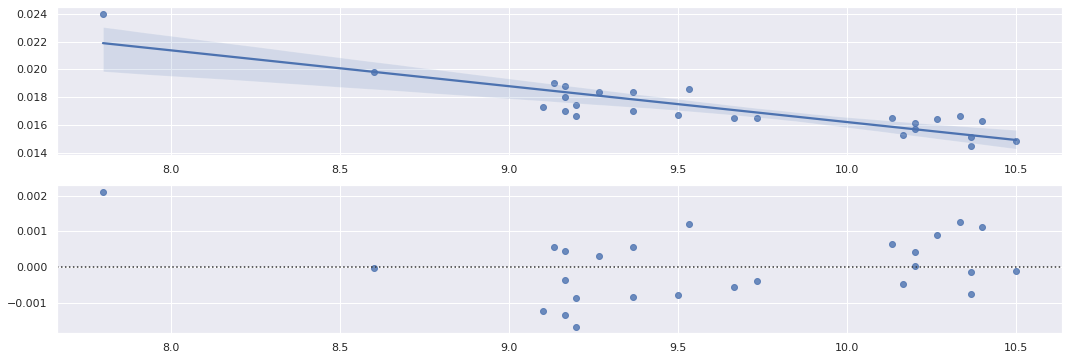

In [ ]:
fig, axes = plt.subplots(2)
sns.regplot(x=df['Tx_cho'].values,y=Y.values, ax=axes[0])
sns.residplot(x=df['Tx_cho'].values,y=Y.values, ax=axes[1])

In [ ]:
col_to_keep += ['Tx_cho']

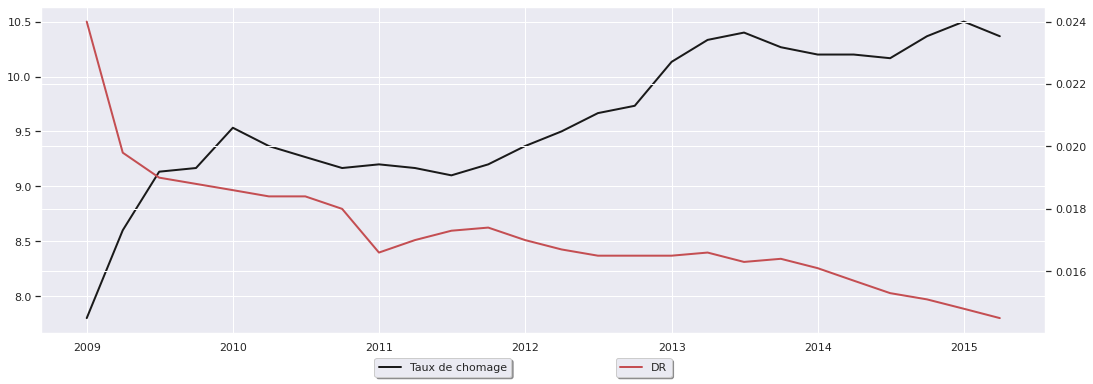

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot(df.index, df['Tx_cho'].values, color='k', linewidth=2)

ax2 = ax1.twinx()
ax2.plot(df.index, Y.values, color='r', linewidth=2)

ax1.legend(loc='upper center', bbox_to_anchor=(0.4, -0.06),
          fancybox=True, shadow=True,ncol=2, 
           labels=['Taux de chomage'])
ax2.legend(loc='upper center', bbox_to_anchor=(0.6, -0.06),
          fancybox=True, shadow=True,ncol=2, 
           labels=['DR'])
plt.show()

In [ ]:
Xb=df.drop(index=df.index[0])
Yb = Y[1:]
def split_data_naif(X,y,test_size):
  n = X.shape[0]
  i = int(n*(1-test_size))
  return X.iloc[:i,:], X.iloc[i:,:], y[:i], y[i:], y.index[i-1]
X_train, X_test, y_train, y_test, date_split = split_data_naif(Xb,Yb,0.15)


from sklearn.linear_model import LinearRegression
linearreg = LinearRegression(n_features= 15,fit_intercept=False)
linearreg = linearreg.fit(X_train,y_train)
y_pred_train = linearreg.predict(X_train)
y_pred = linearreg.predict(X_test)
fig = plt.figure(figsize = (10,10))
plt.plot(list(y_pred_train) + list(y_pred))
plt.plot(list(y_train) + list(y_test),linestyle='dashed')

TypeError: ignored

# Naive regression

In [ ]:
col_to_keep = list(set(col_to_keep))

In [ ]:
col_to_keep

['mean_3',
 'PIB',
 'p95_3',
 'mean_5',
 'p95_5',
 'mean_6',
 'p95_6',
 'CD_ETA_CIV_1',
 'p95_1',
 'p95_8',
 'mean_1',
 'p95_7',
 'mean_4',
 'mean_8',
 'mean_7',
 'Tx_cho',
 'mean_2',
 'CD_MOD_HABI_1',
 'p95_4',
 'p95_2']

In [ ]:
Xnaif = df[col_to_keep].iloc[1:,]
Ynaif = Y[1:]
model = sm.OLS(Ynaif, Xnaif)
results = model.fit()
print(results.summary())
plt.plot(results.predict(Xnaif),color='r')
plt.plot(Ynaif,color='c')
from sklearn.metrics import mean_squared_error
plt.title('mse ='+ str(mean_squared_error(results.predict(Xnaif), Ynaif)))

With split

In [ ]:
def split_data_naif(X,y,test_size):
  n = Xnaif.shape[0]
  i = int(n*(1-test_size))
  return X.iloc[:i,:], X.iloc[i:,:], y[:i], y[i:], y.index[i-1]
X_train_naif, X_test_naif, y_train_naif, y_test_naif, date_split = split_data_naif(Xnaif,Ynaif,0.15)

                            OLS Regression Results                            
Dep. Variable:                     DR   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     16.79
Date:                Fri, 11 Nov 2022   Prob (F-statistic):              0.190
Time:                        17:37:54   Log-Likelihood:                 173.90
No. Observations:                  21   AIC:                            -307.8
Df Residuals:                       1   BIC:                            -286.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
mean_3        -2.291e-05      0.000     -0.170

Text(0.5, 1.0, 'mse =5.102503065500528e-07')

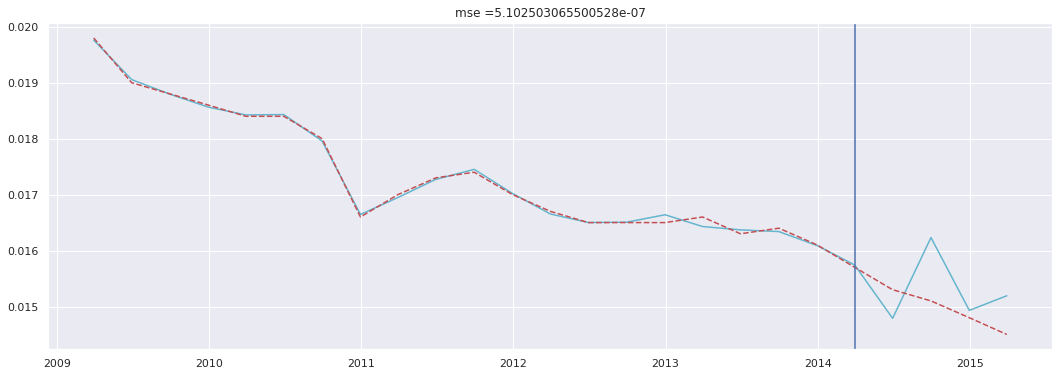

In [ ]:
model = sm.OLS(y_train_naif, X_train_naif)
results = model.fit()
print(results.summary())
plt.plot(results.predict(Xnaif),color='c')
#plt.plot(results.predict(X_test_naif),color='c')
plt.plot(Ynaif,color='r',linestyle='dashed')
#plt.plot(y_test_naif,color='r',linestyle='dashed')
plt.axvline(x = date_split, color = 'b')
from sklearn.metrics import mean_squared_error
plt.title('mse ='+ str(mean_squared_error(results.predict(X_test_naif), y_test_naif)))

We remove variable with high p value

In [ ]:
new_col_to_keep = col_to_keep.copy()
new_col_to_keep.remove('CD_ETA_CIV_1')
new_col_to_keep.remove('p95_3')
new_col_to_keep.remove('mean_1')
new_col_to_keep.remove('p95_4')
n_Xnaif = Xnaif[new_col_to_keep]

In [ ]:
def split_data_naif(X,y,test_size):
  n = Xnaif.shape[0]
  i = int(n*(1-test_size))
  return X.iloc[:i,:], X.iloc[i:,:], y[:i], y[i:], y.index[i-1]
X_train_naif, X_test_naif, y_train_naif, y_test_naif, date_split = split_data_naif(n_Xnaif,Ynaif,0.15)

                                 OLS Regression Results                                
Dep. Variable:                     DR   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                              9098.
Date:                Fri, 11 Nov 2022   Prob (F-statistic):                    4.68e-10
Time:                        17:37:54   Log-Likelihood:                          163.27
No. Observations:                  21   AIC:                                     -294.5
Df Residuals:                       5   BIC:                                     -277.8
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

Text(0.5, 1.0, 'mse =2.637224944445934e-07')

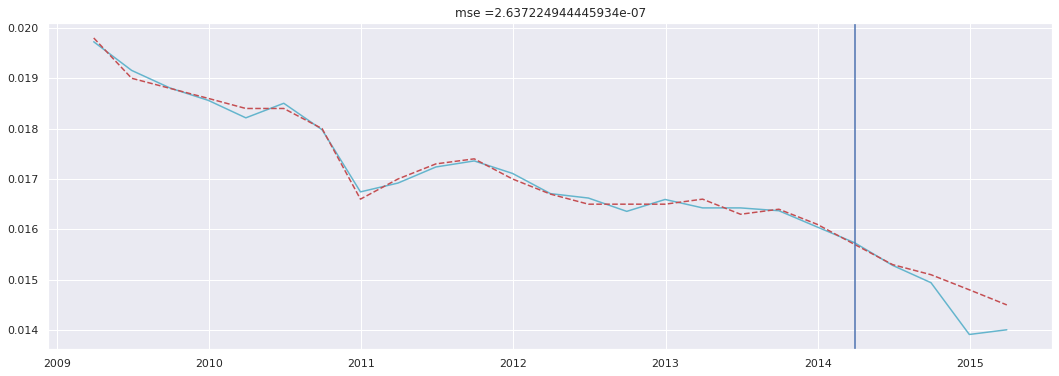

In [ ]:
model = sm.OLS(y_train_naif, X_train_naif)
results = model.fit()
print(results.summary())
plt.plot(results.predict(n_Xnaif),color='c')
#plt.plot(results.predict(X_test_naif),color='c')
plt.plot(Ynaif,color='r',linestyle='dashed')
#plt.plot(y_test_naif,color='r',linestyle='dashed')
plt.axvline(x = date_split, color = 'b')
from sklearn.metrics import mean_squared_error
plt.title('mse ='+ str(mean_squared_error(results.predict(X_test_naif), y_test_naif)))

## For the two others

                                 OLS Regression Results                                
Dep. Variable:                     DR   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              295.4
Date:                Fri, 11 Nov 2022   Prob (F-statistic):                    2.48e-07
Time:                        17:37:54   Log-Likelihood:                          168.19
No. Observations:                  21   AIC:                                     -306.4
Df Residuals:                       6   BIC:                                     -290.7
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

Text(0.5, 1.0, 'mse =1.5018453433537076e-06')

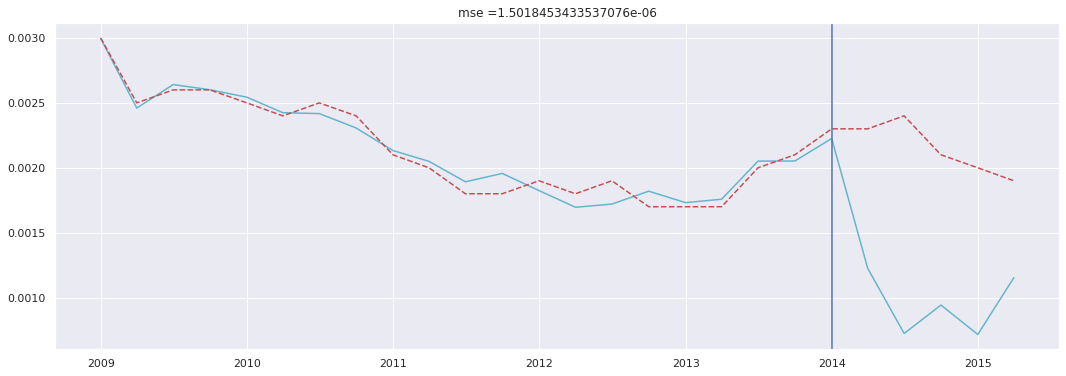

In [ ]:
X2bis = X2[new_col_to_keep]
def split_data_naif(X,y,test_size):
  n = Xnaif.shape[0]
  i = int(n*(1-test_size))
  return X.iloc[:i,:], X.iloc[i:,:], y[:i], y[i:], y.index[i-1]
X_train_naif, X_test_naif, y_train_naif, y_test_naif, date_split = split_data_naif(X2bis,Y2,0.15)
model = sm.OLS(y_train_naif, X_train_naif)
results = model.fit()
print(results.summary())
plt.plot(results.predict(X2bis),color='c')
#plt.plot(results.predict(X_test_naif),color='c')
plt.plot(Y2,color='r',linestyle='dashed')
#plt.plot(y_test_naif,color='r',linestyle='dashed')
plt.axvline(x = date_split, color = 'b')
from sklearn.metrics import mean_squared_error
plt.title('mse ='+ str(mean_squared_error(results.predict(X_test_naif), y_test_naif)))

                                 OLS Regression Results                                
Dep. Variable:                     DR   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                              2936.
Date:                Fri, 11 Nov 2022   Prob (F-statistic):                    7.90e-09
Time:                        17:37:55   Log-Likelihood:                          106.02
No. Observations:                  21   AIC:                                     -180.0
Df Residuals:                       5   BIC:                                     -163.3
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

Text(0.5, 1.0, 'mse =0.0005899521303550561')

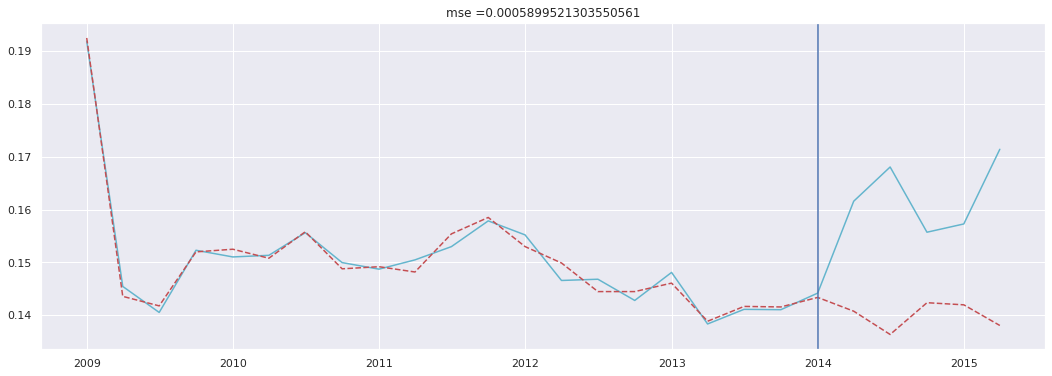

In [ ]:
X8bis = X8[new_col_to_keep]
def split_data_naif(X,y,test_size):
  n = Xnaif.shape[0]
  i = int(n*(1-test_size))
  return X.iloc[:i,:], X.iloc[i:,:], y[:i], y[i:], y.index[i-1]
X_train_naif, X_test_naif, y_train_naif, y_test_naif, date_split = split_data_naif(X8bis,Y8,0.15)
model = sm.OLS(y_train_naif, X_train_naif)
results = model.fit()
print(results.summary())
plt.plot(results.predict(X8bis),color='c')
#plt.plot(results.predict(X_test_naif),color='c')
plt.plot(Y8,color='r',linestyle='dashed')
#plt.plot(y_test_naif,color='r',linestyle='dashed')
plt.axvline(x = date_split, color = 'b')
from sklearn.metrics import mean_squared_error
plt.title('mse ='+ str(mean_squared_error(results.predict(X_test_naif), y_test_naif)))

# Feature selection

https://neptune.ai/blog/feature-selection-methods

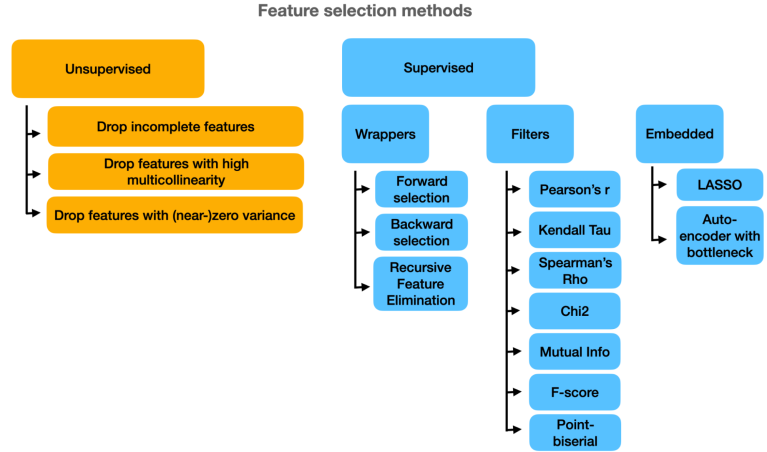

# Feature Engineering

In [ ]:
Xnew = X.copy()

In [ ]:
'''
Xnew['PIBt'] = Xnew['PIB'].pct_change().bfill()
Xnew.drop(['PIB'],axis=1,inplace=True)
Xnew.columns
'''

"\nXnew['PIBt'] = Xnew['PIB'].pct_change().bfill()\nXnew.drop(['PIB'],axis=1,inplace=True)\nXnew.columns\n"

In [ ]:
Xf1 = preprocessing.StandardScaler().fit_transform(Xnew)
Xf2 = preprocessing.MinMaxScaler().fit_transform(Xnew)

Train and test datas

In [ ]:
def split_data(X,y,test_size,keep_extreme=True):
  n = X.shape[0]
  if keep_extreme:
    i = int(n*(1-test_size))
    return X[:i,:], X[i:,:], y[:i], y[i:]
  else:
    n-=1
    i = 1 + int(n*(1-test_size))
    return X[1:i,:], X[:i,:], y[1:i], y[i:]

In [ ]:
X_train0, X_test0, y_train, y_test = split_data(X.values,Y,0.2,keep_extreme=False)
X_train1, X_test1, y_train, y_test = split_data(Xf1,Y,0.2,keep_extreme=True)
X_train2, X_test2, y_train, y_test = split_data(Xf2,Y,0.2,keep_extreme=True)

# Model building

## Avec fichier hugo

In [ ]:
# Importing the file with Tools usefull to ML (created by our team)
import sys
sys.path.append('/content/gdrive/MyDrive/DRIM challenge/')
import tools as tl

ModuleNotFoundError: ignored

In [ ]:
# Simple model without any gridsearch 

models = ["lin","rid","las","ela","sgd","xgb","svr","knn"]
metrics = ["rmse","mse","mae","r2"]
parameters = {"p_xgb":{"booster":"gblinear"}}

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(n_Xnaif,Ynaif,test_size=0.15,shuffle=False)

'''
from sklearn.preprocessing import MinMaxScaler,StandardScaler

scaler_train = MinMaxScaler()
scaler_test = MinMaxScaler()

scaler_train.fit(X_train)
scaler_test.fit(X_test)

X_train = pd.DataFrame(scaler_train.transform(X_train),index = X_train.index,columns = X_train.columns)
X_test = pd.DataFrame(scaler_train.transform(X_test),index = X_test.index,columns = X_test.columns)
'''


tl.summary_ml(X_train,y_train,X_test,y_test,models,parameters=parameters,metrics = metrics)

In [ ]:
from sklearn.linear_model import LinearRegression
linearreg = LinearRegression(fit_intercept=False)
linearreg = linearreg.fit(X_train,y_train)
y_pred_train = linearreg.predict(X_train)
y_pred = linearreg.predict(X_test)
fig = plt.figure(figsize = (10,10))
plt.plot(list(y_pred_train) + list(y_pred))
plt.plot(list(y_train) + list(y_test),linestyle='dashed')

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso = lasso.fit(X_train,y_train)
y_pred_train = lasso.predict(X_train)
y_pred = lasso.predict(X_test)
fig = plt.figure(figsize = (10,10))
plt.plot(list(y_pred_train) + list(y_pred))
plt.plot(list(y_train) + list(y_test),linestyle='dashed')

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1)
ridge = ridge.fit(X_train,y_train)
y_pred_train = ridge.predict(X_train)
y_pred = ridge.predict(X_test)
fig = plt.figure(figsize = (10,10))
plt.plot(list(y_pred_train) + list(y_pred))
plt.plot(list(y_train) + list(y_test),linestyle='dashed')

In [ ]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=0.1)
elasticnet = elasticnet.fit(X_train,y_train)
y_pred_train = elasticnet.predict(X_train)
y_pred = elasticnet.predict(X_test)
fig = plt.figure(figsize = (10,10))
plt.plot(list(y_pred_train) + list(y_pred))
plt.plot(list(y_train) + list(y_test),linestyle='dashed')

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb = xgb.fit(X_train,y_train)
y_pred_train = xgb.predict(X_train)
y_pred = xgb.predict(X_test)
fig = plt.figure(figsize = (10,10))
plt.plot(list(y_pred_train) + list(y_pred))
plt.plot(list(y_train) + list(y_test),linestyle='dashed')

In [ ]:
from sklearn.linear_model import SGDRegressor

sdg = SGDRegressor()
sdg = sdg.fit(X_train,y_train)
y_pred_train = sdg.predict(X_train)
y_pred = sdg.predict(X_test)
fig = plt.figure(figsize = (10,10))
plt.plot(list(y_pred_train) + list(y_pred))
plt.plot(list(y_train) + list(y_test),linestyle='dashed')

# TEST

## Classic Time Series

In [ ]:
#Y_diff = Y.pct_change().dropna()
Y_diff = Y.pct_change().dropna()

In [ ]:
sns.lineplot(data=Y_diff,color= 'r')

We remove the beginning

In [ ]:
Y_cut = Y_diff[5:]
sns.lineplot(data=Y_cut,color= 'r')

And the outlier

In [ ]:
Y_f = Y_cut[Y_cut > Y_cut.min()]
sns.lineplot(data=Y_f,color= 'r')

In [ ]:
sns.histplot(data=Y_f,bins = 50, color='c', edgecolor='k')

In [ ]:
adfuller(Y_f)[1]

In [ ]:
import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

tsplot(Y_f, lags=5)

In [ ]:
from itertools import product 
# setting initial values and some bounds for them
ps = range(1, 5)
d=1 
qs = range(1, 5)
Ps = range(0, 2)
D=1 
Qs = range(0, 2)
s = 24 # season length is still 24

# creating list with all the possible combinations of parameters
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

In [ ]:
from tqdm import tqdm_notebook

def optimizeSARIMA(parameters_list, d, D, s):
    """
        Return dataframe with parameters and corresponding AIC
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order in ARIMA model
        D - seasonal integration order 
        s - length of season
    """
    
    results = []
    best_aic = float("inf")

    for param in tqdm_notebook(parameters_list):
        # we need try-except because on some combinations model fails to converge
        try:
            model=sm.tsa.statespace.SARIMAX(Y_f, order=(param[0], d, param[1]), 
                                            seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
        aic = model.aic
        # saving best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])

    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    # sorting in ascending order, the lower AIC is - the better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table

In [ ]:
%%time
result_table = optimizeSARIMA(parameters_list, d, D, s)

In [ ]:
result_table.head()

In [ ]:
p, q, P, Q = result_table.parameters[0]

best_model=sm.tsa.statespace.SARIMAX(Y_f, order=(p, d, q), 
                                        seasonal_order=(P, D, Q, s)).fit(disp=-1)
print(best_model.summary())

## Correlation selection

In [ ]:
def corre(df):
  cor = df.corr()
  sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
  plt.show()

In [ ]:
def keep_col(df,tresholdDR,interTreshold):
  df_temp = df.copy()
  df_temp.insert(loc=0, column='DR', value=Y.values)
  corr_matrix = df_temp.corr()
  *index, = map(lambda x: abs(x)>tresholdDR,corr_matrix.loc['DR'])
  print('Columns with corr with DR >' +str(tresholdDR)+':',df_temp.columns[index].values[1:],str(index.count(True)-1)+' variables',sep='\n')
  
  print('\n','After studying inter correlation')
  keep_col = set()
  cols = df_temp.columns[index].values[1:]
  for col1 in cols:
    for col2 in cols:
      if col1 != col2 and abs(corr_matrix.loc[col1,col2])>interTreshold:
        col_to_keep =corr_matrix.loc['DR',[col1,col2]].idxmax()
        keep_col.add(col_to_keep)
  print('Columns with inter corr<' +str(interTreshold)+':',keep_col,str(len(keep_col))+' variables',sep='\n')
  return list(keep_col)
keep_col = keep_col(X,0.75,0.5)

In [ ]:
X = X[keep_col].copy()
X.insert(0,'Constant',1)
y = pd.DataFrame(Y.values, index=X.index)

# we remove the GFC
#X,y = X.iloc[:,3:], y[3:]

X_train0, X_test0, y_train, y_test = split_data(X.values,Y,0.2,keep_gfc=False)

In [ ]:
'''
from sklearn.model_selection import train_test_split
## split data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42,shuffle=False)
## print info
print("X_train shape:", X_train.shape, "| X_test shape:", X_test.shape)
print(X_train.shape[1], "features:", X_train.columns.to_list())
'''

In [ ]:
y_tr = y_train #pd.DataFrame(y_train.values, index=X.index)
X_tr = X_train0
model = sm.OLS(y_tr, X_tr)
results = model.fit()
print(results.summary())
#print(results.pvalues)

In [ ]:
results.predict(X_test0) - y_test.values

In [ ]:
plt.plot(results.predict(X_test0),color='r')
plt.plot(y_test.values,color='c')

In [ ]:
plt.plot(results.predict(X),color='r')
plt.plot(y,color='c')

## RFE (Recursive Feature Elimination)

In [ ]:
X = df.copy()
y = pd.DataFrame(Y.values, index=X.index)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
#no of features
nof_list=np.arange(1,82)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,n_features_to_select=nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

In [ ]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, n_features_to_select=20)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

## Embedded Method

In [ ]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

In [ ]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

In [ ]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

## Forecast

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
X = df.copy()
y = pd.DataFrame(Y.values, index=X.index)

X=X[2:]
y=y[2:]

pipe = make_pipeline(StandardScaler(), LinearRegression())
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pipe = make_pipeline(StandardScaler(), LinearRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data
pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

In [ ]:
y_pred = pd.DataFrame(pipe.predict(X),index=X.index)
plt.plot(y_pred,color='r')
plt.plot(y,color='c')

## Kaggle


https://www.kaggle.com/code/eraaz1/a-comprehensive-guide-to-advanced-regression#10.Feature-Engineering-

In [ ]:
'''Set a seed for reproducibility'''
seed = 43

'''Initialize all the regression models object we are interested in.'''
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


'''We are interested in the following 14 regression models.
All initialized with default parameters except random_state and n_jobs.'''
linear = LinearRegression(n_jobs = -1)
lasso = Lasso(random_state = seed)
ridge = Ridge(random_state = seed)
kr = KernelRidge()
elnt = ElasticNet(random_state = seed)
dt = DecisionTreeRegressor(random_state = seed)
svm = SVR()
knn = KNeighborsRegressor(n_jobs = -1)
rf =  RandomForestRegressor(n_jobs = -1, random_state = seed)
et = ExtraTreesRegressor(n_jobs = -1, random_state = seed)
ab = AdaBoostRegressor(random_state = seed)
gb = GradientBoostingRegressor(random_state = seed)
xgb = XGBRegressor(random_state = seed, n_jobs = -1)
lgb = LGBMRegressor(random_state = seed, n_jobs = -1)

In [ ]:
def acc(df_train_final,y_train):
  '''Training accuracy of our regression models. By default score method returns coefficient of determination (r_squared).'''
  def train_r2(model):
      model.fit(df_train_final, y_train)
      return model.score(df_train_final, y_train)

  '''Calculate and plot the training accuracy.'''
  models = [linear, lasso, ridge, kr, elnt, dt, svm, knn, rf, et, ab, gb, xgb, lgb]
  training_score = []
  for model in models:
      training_score.append(train_r2(model))
      
  '''Plot dataframe of training accuracy.'''
  train_score = pd.DataFrame(data = training_score, columns = ['Training_R2'])
  train_score.index = ['LR', 'LSO', 'RIDGE', 'KR', 'ELNT', 'DT', 'SVM', 'KNN', 'RF', 'ET', 'AB', 'GB', 'XGB', 'LGB']
  train_score = (train_score*100).round(4)
  #scatter_plot(train_score.index, train_score['Training_R2'], 'Training Score (R_Squared)', 'Models','% Training Score', 30, 'Rainbow')
  t=train_score
  sns.scatterplot(data=t,x=t.index,y='Training_R2')
  #return train_score
  #sns.scatterplot(y=train_score.values,x=train_score.index)

In [ ]:
acc(X_train0,y_train)

In [ ]:
acc(X_train1,y_train)

In [ ]:
acc(X_train2,y_train)

In [ ]:
def acc2(X_train, X_test, Y_train, Y_test):
  '''Evaluate models on the holdout set(say on 30%).'''
  def train_test_split_score(model):
      from sklearn.metrics import mean_squared_error
      model.fit(X_train, Y_train)
      prediction = model.predict(X_test)
      mse = mean_squared_error(prediction, Y_test)
      rmse = np.sqrt(mse)
      return rmse

  '''Calculate train_test_split score of differnt models and plot them.'''
  models = [lasso, ridge, kr, elnt, dt, svm, knn, rf, et, ab, gb, xgb, lgb]
  train_test_split_rmse = []
  for model in models:
      train_test_split_rmse.append(train_test_split_score(model))

  '''Plot data frame of train test rmse'''
  train_test_score = pd.DataFrame(data = train_test_split_rmse, columns = ['Train_Test_RMSE'])
  train_test_score.index = ['LSO', 'RIDGE', 'KR', 'ELNT', 'DT', 'SVM', 'KNN', 'RF', 'ET', 'AB', 'GB', 'XGB', 'LGB']
  train_test_score = train_test_score.round(5)
  t = train_test_score
  sns.scatterplot(data=t,x=t.index,y='Train_Test_RMSE')

In [ ]:
acc2(X_train0, X_test0, y_train, y_test)

In [ ]:
acc2(X_train1, X_test1, y_train, y_test)

In [ ]:
acc2(X_train2, X_test2, y_train, y_test)